<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>ABCDEats Inc.</center></div> <br>
<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Part 1 | Exploratory Data Analysis</center></div> <br>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Data Mining Project 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 17:</center></div>
   <div><center> André Sousa | 20240517 </center></div>
   <div><center> Isabella Costa | 20240685 </center></div>
   <div><center> Jéssica Cristas | 20240488 </center></div>
   <div><center> Tiago Castilho | 20240489 </center></div>

<hr style="border: 4px solid #A3C86A;border-radius: 4px;">

# Index

  * [1. Initial Analysis](#Initial_Analysis)
    * [1.1. Missing Values](#mia)
    * [1.2. Duplicates](#dupes)
    
  * [2. Univariate Analysis of Features](#uni_analysis)
    * [2.1. Customer Region](#customer-region)
    * [2.2. Customer Age](#customer-age)
    * [2.3. Vendor Count](#vendor)
    * [2.4. Product Count](#product)
    * [2.5. Is Chain](#is-chain)
    * [2.6. First and Last Order](#first-last)
    * [2.7. Last Promo](#promo)
    * [2.8. Payment Method](#payment)
    * [2.9. CUI Analysis](#cui_analysis)
    * [2.10 Days of the week](#dow)
    * [2.11 Hours of orders](#hours)
  
  * [3. Bivariate Feature Analysis](#bi_analysis)
    * [3.1. Feature Correlation](#feature_corr)
    * [3.2. Vendor  Count and Is Chain](#vendor_chain)
    * [3.3. Product Count and Is Chain](#product_chain)
    * [3.4. Vendor Count and Product Count](#vendor_product)
    * [3.5. Customer age and Food Preference](#age_food)
    * [3.6. Customer age and most frequently used Payment Method](#age_payment)
    * [3.7. Customer Age and number of orders for Days of the Week ](#age_days)
    * [3.8. Customer Age and number of orders for Hours](#age_hours)
    * [3.9. Customer Age and number of orders from Restaurant Chains](#age_chain)
    * [3.10. Chain Restaurants and most frequently used Payment Method](#chain_payment)
    * [3.11. Customer Region and type of Cuisine most purchased](#region_cui)
    * [3.12. Customer Region and Costumer Age](#region_age)
  
  * [4. Feature Engineering](#feature_eng)
    * [4.1. Total Orders](#total_ord)
    * [4.2. Mealtime Hours](#meal_hour)
    * [4.3. Max Cuisine](#max_cui)
    * [4.4. Group by Age Range](#group_age)

># **1. Initial Analysis** <a class="anchor" id="initial_analysis"></a>

Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import textwrap
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv', index_col='customer_id')

In [4]:
df.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00            0.0       0.0   
5d272b9dcb          12.82       6.39            0.0       0.0   
f6d1b2ba63           9.20       0.00            0.0       0.0   
180c632ed8           0.00      13.70            0.0       0.0   
4eb37a6705          14.57      40.87            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88          0.0           0.0                0.0   
5d272b9dcb         0.00          0.0           0.0                0.0   
f6d1b2ba63         0.00          0.0           0.0                0.0   
180c632ed8        17.86          0.0           0.0                0.0   
4eb37a6705         0.00          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
1b8f824d5e         0.0                       0.0       0.0      1      0   
5d272b9dcb         0.0                       0.0       0.0      1      0   
f6d1b2ba63         0.0                       0.0       0.0      1      0   
180c632ed8         0.0                       0.0       0.0      0      1   
4eb37a6705         0.0                       0.0       0.0      0      1   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
1b8f824d5e       0      0      0      0      1   0.0     0     0     0     0   
5d272b9dcb       0      0      0      0      1   0.0     0     0     0     0   
f6d1b2ba63       0      0      0      0      1   0.0     0     0     0     0   
180c632ed8       0      0      0      0      1   0.0     0     0     0     0   
4eb37a6705       0      0      0      0      1   0.0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0    

In [5]:
df.tail()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0          -           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0          -           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
f4e366c281          0.0         0.00           0.0                0.0   
f6b6709018          0.0         0.00           0.0                0.0   
f74ad8ce3f          0.0         0.00           0.0                0.0   
f7b19c0241          0.0         0.00           0.0                0.0   
fd40d3b0e0          0.0         7.91           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
f4e366c281         0.0                       0.0       0.0      0      0   
f6b6709018         0.0                       0.0       0.0      0      0   
f74ad8ce3f         0.0                       0.0       0.0      0      0   
f7b19c0241         0.0                       0.0       0.0      0      0   
fd40d3b0e0         0.0                       0.0       0.0      0      0   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
f4e366c281       0      0      0      0      1   0.0     0     0     0     0   
f6b6709018       0      0      0      0      1   0.0     0     0     0     0   
f74ad8ce3f       0      0      0      0      1   0.0     0     0     0     0   
f7b19c0241       0      0      0      0      1   0.0     0     0     0     0   
fd40d3b0e0       0      0      0      0      1   0.0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
f4e366c281      0     0     0     0     0      0      0      0      1      0   
f6b6709018      0     0     0     0     0      0      0      0      0      0   
f74ad8ce3f      1     0     0     0     0      0    

In [6]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Different possible values of categorical features.

In [8]:
#values that categorical features can take
df_cat = df.select_dtypes(include='object').columns.tolist()
for col in df_cat:
    print(f'{col} : {df[col].unique()}')

customer_region : ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
last_promo : ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
payment_method : ['DIGI' 'CASH' 'CARD']


> ### 1.1 Missing Values <a class="anchor" id="mia"></a>

At first glance, it appears that there are few missing values.

In [9]:
# Percentage of missing values for each feature
df.isnull().sum()/df.shape[0]*100

customer_region             0.000000
customer_age                2.279854
vendor_count                0.000000
product_count               0.000000
is_chain                    0.000000
first_order                 0.332413
last_order                  0.000000
last_promo                  0.000000
payment_method              0.000000
CUI_American                0.000000
CUI_Asian                   0.000000
CUI_Beverages               0.000000
CUI_Cafe                    0.000000
CUI_Chicken Dishes          0.000000
CUI_Chinese                 0.000000
CUI_Desserts                0.000000
CUI_Healthy                 0.000000
CUI_Indian                  0.000000
CUI_Italian                 0.000000
CUI_Japanese                0.000000
CUI_Noodle Dishes           0.000000
CUI_OTHER                   0.000000
CUI_Street Food / Snacks    0.000000
CUI_Thai                    0.000000
DOW_0                       0.000000
DOW_1                       0.000000
DOW_2                       0.000000
D

Let's check what values the variables can take.

In [10]:
for column in df.columns:
    print(df[column].value_counts())

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64
customer_age
23.0    2361
22.0    2318
24.0    2304
25.0    2262
26.0    2059
21.0    1995
27.0    1922
28.0    1630
29.0    1505
20.0    1441
30.0    1290
31.0    1094
19.0    1058
32.0     970
33.0     860
34.0     741
35.0     621
18.0     588
36.0     520
37.0     426
38.0     400
39.0     343
40.0     315
17.0     269
41.0     259
43.0     219
42.0     212
44.0     157
45.0     123
46.0     123
48.0      89
47.0      88
16.0      76
50.0      65
49.0      59
51.0      58
53.0      53
52.0      47
54.0      34
55.0      28
58.0      26
15.0      20
56.0      19
57.0      17
59.0      12
60.0       9
62.0       8
68.0       8
61.0       7
63.0       7
65.0       6
77.0       6
66.0       5
67.0       4
70.0       3
80.0       3
72.0       3
74.0       3
76.0       2
69.0       2
64.0       2
79.0       2
75.0       2
78.0     

Some features have values represented by a '-'. Let's examine their unique values to understand what's happening.

In [11]:
print('Customer Region:', df['customer_region'].unique())
print('Customer Age:', df['customer_age'].unique())
print('First Order:', df['first_order'].unique())
print('Hour 0:', df['HR_0'].unique())
print('Last Promo:', df['last_promo'].unique())

Customer Region: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
Customer Age: [18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]
First Order: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. nan]
Hour 0: [ 0. nan]
Last Promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']


The '-' values in these features represent missing data, so let's replace them with NaN.

In [12]:
df.replace('-', np.nan, inplace=True)

In [13]:
# Percentage of missing values for each feature
df.isnull().sum()/df.shape[0]*100

customer_region              1.386101
customer_age                 2.279854
vendor_count                 0.000000
product_count                0.000000
is_chain                     0.000000
first_order                  0.332413
last_order                   0.000000
last_promo                  52.521325
payment_method               0.000000
CUI_American                 0.000000
CUI_Asian                    0.000000
CUI_Beverages                0.000000
CUI_Cafe                     0.000000
CUI_Chicken Dishes           0.000000
CUI_Chinese                  0.000000
CUI_Desserts                 0.000000
CUI_Healthy                  0.000000
CUI_Indian                   0.000000
CUI_Italian                  0.000000
CUI_Japanese                 0.000000
CUI_Noodle Dishes            0.000000
CUI_OTHER                    0.000000
CUI_Street Food / Snacks     0.000000
CUI_Thai                     0.000000
DOW_0                        0.000000
DOW_1                        0.000000
DOW_2       

Here we can see that only 4 features have missing values:
*  _`customer_region`_ - 1.38 %
* _`customer_age`_ - 2.28 %
* _`first_order`_ - 0.33 %
* _`HR_0`_ - 3.65 % 
* _`last_promo`_ - 52.52 %<br>


With _`last_promo`_ presenting a large amount of missing data

Let's verify that the values in these variables have been successfully replaced

In [14]:
print('Customer Region:', df['customer_region'].unique())
print('Customer Age:', df['customer_age'].unique())
print('First Order:', df['first_order'].unique())
print('Hour 0:', df['HR_0'].unique())
print('Last Promo:', df['last_promo'].unique())

Customer Region: ['2360' '8670' '4660' '2440' nan '4140' '2490' '8370' '8550']
Customer Age: [18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]
First Order: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. nan]
Hour 0: [ 0. nan]
Last Promo: ['DELIVERY' 'DISCOUNT' nan 'FREEBIE']


Plotting Missing Values in the features.

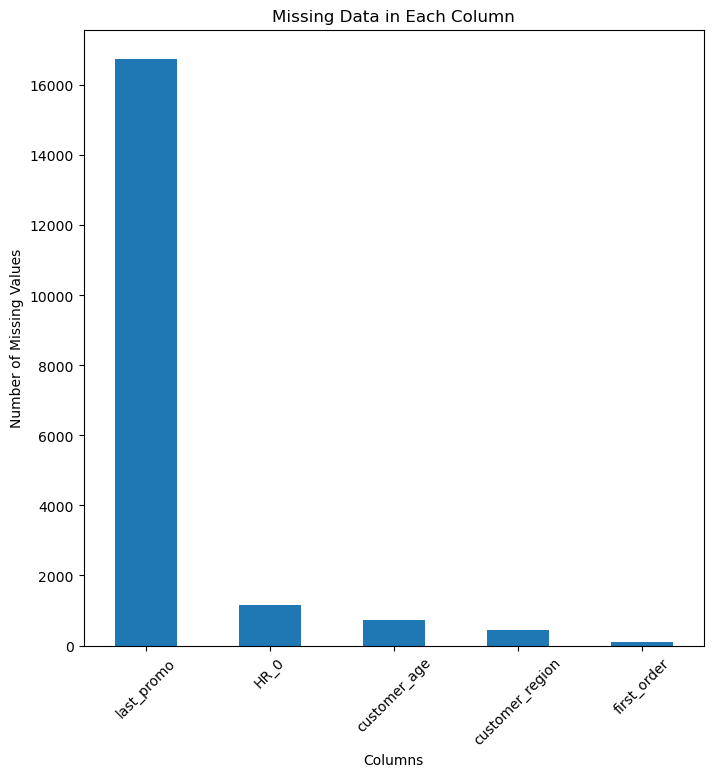

In [15]:
missing_data = df.isnull().sum()

missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plotting the missing data
plt.figure(figsize=(8, 8))
missing_data.plot(kind='bar')
plt.title('Missing Data in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [16]:
df.describe()

customer_age  vendor_count  product_count      is_chain   first_order  \
count  31161.000000  31888.000000   31888.000000  31888.000000  31782.000000   
mean      27.506499      3.102609       5.668245      2.818866     28.478604   
std        7.160898      2.771587       6.957287      3.977529     24.109086   
min       15.000000      0.000000       0.000000      0.000000      0.000000   
25%       23.000000      1.000000       2.000000      1.000000      7.000000   
50%       26.000000      2.000000       3.000000      2.000000     22.000000   
75%       31.000000      4.000000       7.000000      3.000000     45.000000   
max       80.000000     41.000000     269.000000     83.000000     90.000000   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000  31888.000000   31888.000000  31888.000000   
mean      63.675521      4.880438      9.960451       2.300633      0.801163   
std       23.226123     11.654018     23.564351       8.479734      6.427132   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       49.000000      0.000000      0.000000       0.000000      0.000000   
50%       70.000000      0.000000      0.000000       0.000000      0.000000   
75%       83.000000      5.660000     11.830000       0.000000      0.000000   
max       90.000000    280.210000    896.710000     229.220000    326.100000   

       CUI_Chicken Dishes   CUI_Chinese  CUI_Desserts   CUI_Healthy  \
count        31888.000000  31888.000000  31888.000000  31888.000000   
mean             0.768096      1.431218      0.884359      0.950203   
std              3.657273      8.191755      5.259868      5.830590   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000      0.000000      0.000000      0.000000   
75%              0.000000      0.000000      0.000000      0.000000   
max            219.660000    739.730000    230.070000    255.810000   

         CUI_Indian   CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
count  31888.000000  31888.000000  31888.000000       31888.000000   
mean       1.631153      3.233411      2.995379           0.711676   
std        7.443234     11.247990     10.180851           4.536457   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      0.000000           0.000000   
75%        0.000000      0.000000      0.000000           0.000000   
max      309.070000    468.330000    706.140000         275.110000   

          CUI_OTHER  CUI_Street Food / Snacks      CUI_Thai         DOW_0  \
count  31888.000000              31888.000000  31888.000000  31888.000000   
mean       2.999913                  3.913253      0.841697      0.555914   
std        9.768300                 15.548507      4.433047      1.013601   
min        0.000000                  0.000000      0.000000      0.000000   
25%        0.000000                  0.000000      0.000000      0.000000   
50%        0.000000                  0.000000      0.000000      0.000000   
75%        0.000000                  0.000000      0.000000      1.000000   
max      366.080000                454.450000    136.380000     16.000000   

              DOW_1         DOW_2         DOW_3         DOW_4         DOW_5  \
count  31888.000000  31888.000000  31888.000000  31888.000000  31888.000000   
mean       0.567486      0.591006      0.619449      0.677747      0.652973   
std        1.044090      1.045907      1.069672      1.088122      1.069947   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000

In [17]:
df.describe(include='O')

customer_region last_promo payment_method
count            31446      15140          31888
unique               8          3              3
top               8670   DELIVERY           CARD
freq              9761       6286          20161

In [18]:
df.isna().sum()

customer_region               442
customer_age                  727
vendor_count                    0
product_count                   0
is_chain                        0
first_order                   106
last_order                      0
last_promo                  16748
payment_method                  0
CUI_American                    0
CUI_Asian                       0
CUI_Beverages                   0
CUI_Cafe                        0
CUI_Chicken Dishes              0
CUI_Chinese                     0
CUI_Desserts                    0
CUI_Healthy                     0
CUI_Indian                      0
CUI_Italian                     0
CUI_Japanese                    0
CUI_Noodle Dishes               0
CUI_OTHER                       0
CUI_Street Food / Snacks        0
CUI_Thai                        0
DOW_0                           0
DOW_1                           0
DOW_2                           0
DOW_3                           0
DOW_4                           0
DOW_5         

However, we can observe that the last_promo column has 16,748 missing values, which is a substantial amount of missing data for this feature. Does this indicate that those customers did not utilize any promotions in the past three months, or are these values genuinely missing?

> ### 1.2 Duplicates <a class="anchor" id="dupes"></a>

We have two types of duplicate cases:

- Duplicate rows where `customer_id` and all other feature values are identical.

- Duplicate rows where `customer_id` is the same, but values in other features differ.

In [19]:
dups = df[df.duplicated(keep=False)]
print(df.duplicated().sum())  # Number of duplicate lines

id_dups = dups.groupby('customer_id').size() 
print(id_dups[id_dups > 1].sum()) # 26 lines duplicated with the same customer_id

60
26


># **2. Univariate Analysis of Features** <a class="anchor" id="uni_analysis"></a>

>### **2.1 Customer Region** <a class="anchor" id="customer-region"></a>

In [20]:
df['customer_region'].describe()

count     31446
unique        8
top        8670
freq       9761
Name: customer_region, dtype: object

In [21]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', nan, '4140', '2490', '8370',
       '8550'], dtype=object)

Let's examine the distribution of `customer_region` values and verify if they follow a consistent format.

In [22]:
df['customer_region'].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
8550      26
Name: count, dtype: int64

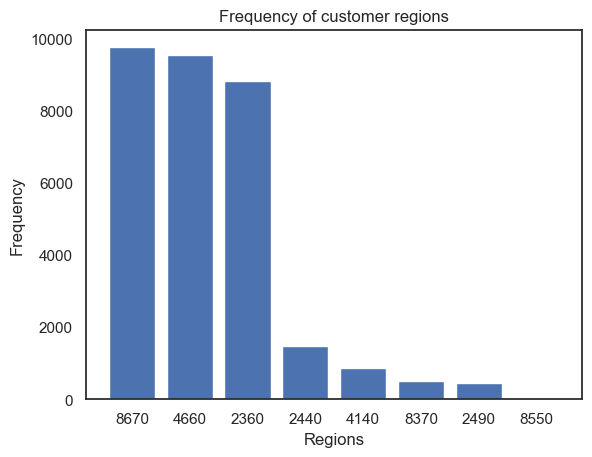

In [23]:
sns.set_theme(style="white")

fig, ax = plt.subplots()
regions = df['customer_region'].value_counts()
ax.bar(regions.index, regions.values)
ax.set_title('Frequency of customer regions')
ax.set_xlabel('Regions')
ax.set_ylabel('Frequency')
plt.show()

The following plot shows that most of our customers are concentrated in three region codes: 8670, 4460, and 2360. Collectively, these codes account for 88.2% of the `customer_region` values.

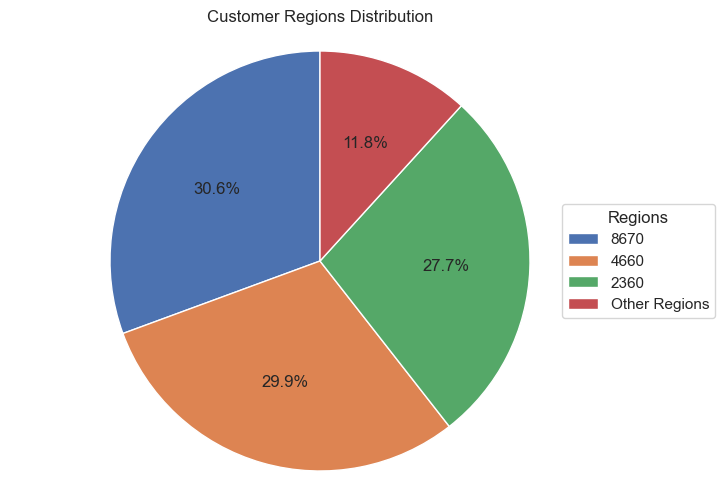

In [24]:
# Separate the regions into frequent and infrequent regions
frequent_regions = ['8670', '4660', '2360']

df_plot = df.copy()

df_plot['region category'] = df['customer_region'].apply(lambda x: x if x in frequent_regions else 'Other Regions')

regions = df_plot['region category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(regions, autopct='%1.1f%%', startangle=90)

plt.legend(regions.index, title='Regions', loc='center right', bbox_to_anchor=(0.65, 0, 0.5, 1))

plt.title('Customer Regions Distribution')

plt.axis('equal')

plt.show()

_____

>### **2.2 Customer Age** <a class="anchor" id="customer-age"></a>

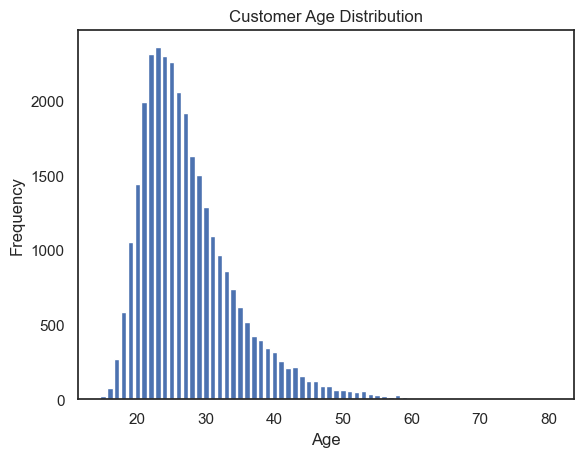

In [25]:
# barplot for customer age
sns.set_theme(style="white")
fig, ax = plt.subplots()
ages = df['customer_age'].dropna().value_counts()
ax.bar(ages.index, ages.values)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The next plot shows that our customer base primarily consists of young individuals aged 20 to 30, with some outliers above 40 years old.

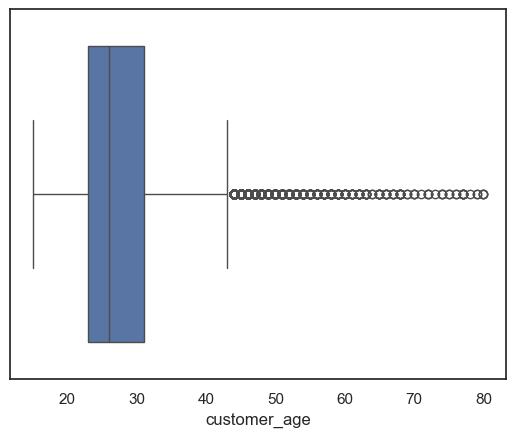

In [26]:
sns.boxplot(x=df['customer_age'].dropna())

plt.show()

________

>### **2.3 Vendor Count** <a class="anchor" id="vendor"></a>

In [27]:
def plot_distribution_with_limit(df, column, threshold):
    plt.figure(figsize=(15, 10))
    fig, ax = plt.subplots()

    # count the occurrences of each product count value
    product = df[column].dropna().value_counts().sort_index()

    # separate data into two parts: counts <= bthreshold and counts > upthreshold
    below_threshold = product[product.index <= threshold]
    above_threshold = product[product.index > threshold].sum()  # Sum of values above upthreshold

    # convert index to string
    below_threshold.index = below_threshold.index.astype(str)

    # add the combined "above upthreshold" entry to the data for plotting
    below_threshold[f">{threshold}"] = above_threshold

    # plot the data
    ax.bar(below_threshold.index, below_threshold.values)
    ax.set_title(f"Frequency of {column} values")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

    ax.set_xticks(range(len(below_threshold)))
    ax.set_xticklabels(below_threshold.index, rotation=45, ha='right')

    plt.show()

In [28]:
def count_outliers_iqr(df, variable):
    """
    Calculates the number of outliers in a specified column of a DataFrame 
    based on the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    variable (str): The name of the column to check for outliers.

    Returns:
    int: The number of outliers in the specified column.
    """
    # Calculate Q1, Q3, and IQR
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1

    # define outlier thresholds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # count outliers
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    outlier_count = outliers.shape[0]

    return outlier_count

<Figure size 1500x1000 with 0 Axes>

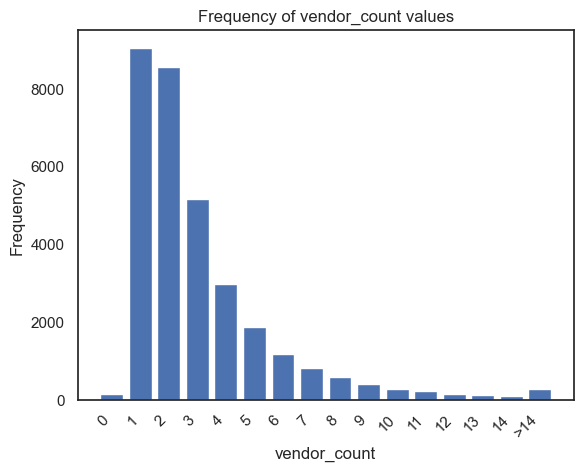

In [29]:
plot_distribution_with_limit(df, 'vendor_count', 14)

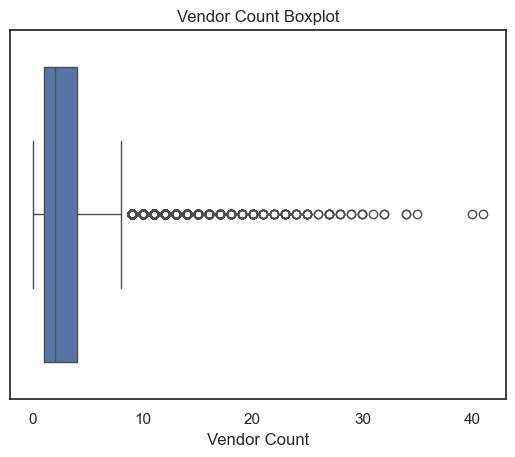

In [30]:
sns.boxplot(x=df['vendor_count'])
plt.title('Vendor Count Boxplot')
plt.xlabel('Vendor Count')
plt.show()

The `vendor_count` feature contains a few notable outliers.

In [31]:
print('Outliers for vendor count:',count_outliers_iqr(df, 'vendor_count'))

Outliers for vendor count: 1524


______

>### **2.4 Product Count** <a class="anchor" id="product"></a>

<Figure size 1500x1000 with 0 Axes>

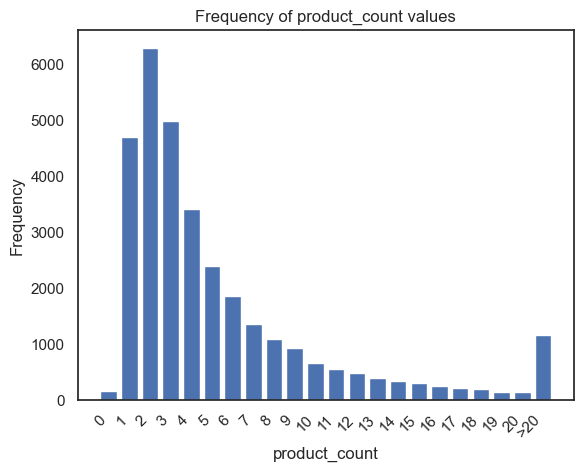

In [32]:
plot_distribution_with_limit(df, 'product_count', 20)

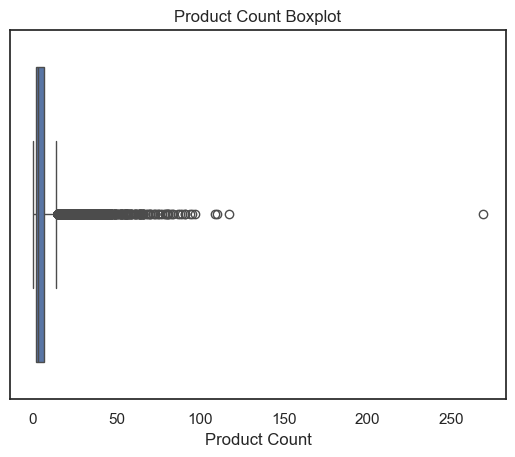

In [33]:
sns.boxplot(x=df['product_count'])
plt.title('Product Count Boxplot')
plt.xlabel('Product Count')
plt.show()

We can observe a significant presence of outliers in the `product_count` feature.

In [34]:
print('Outliers for product count:', count_outliers_iqr(df, 'product_count'))

Outliers for product count: 2371


_____

>### **2.5 Is Chain** <a class="anchor" id="is-chain"></a>

The feature _`is_chain`_ presents an inconsistency when we compare it's description,"Indicates whether the customer’s order was from a chain restaurant.", to the actual values in the dataset:

In [35]:
df["is_chain"].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

Based on the description, we would expect this feature to take on binary values. However, the observations range from 0 to 80, exhibiting the following distribution.

<Figure size 1500x1000 with 0 Axes>

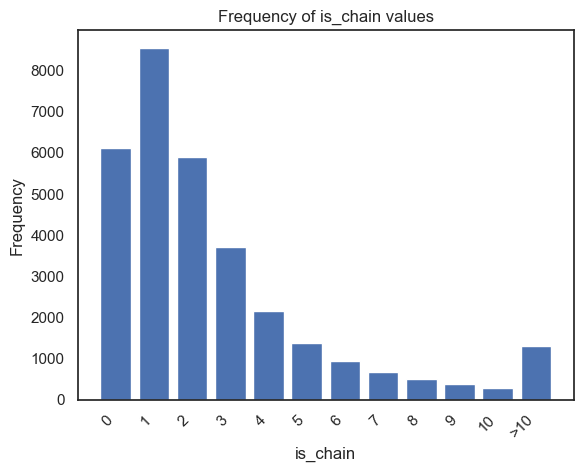

In [36]:
plot_distribution_with_limit(df, 'is_chain',  10)

Based on the values of `is_chain`, we have determined that an appropriate description for this feature is: The number of times a customer has ordered from a chain restaurant. We should also consider renaming it to something more suitable, such as `chain_orders`.

In [37]:
dows = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Calculate the sum for each specified column
dow_sum = df[dows].sum()
total_sum = dow_sum.sum()

is_chain_sum = df['is_chain'].sum()

print((is_chain_sum / total_sum) * 100,'%') # Percentage of the purchases that were made in a chain restaurant


64.52233459906829 %


From this, we can see that 64.5% of the orders were made at chain restaurants.

_______

>### **2.6 First and Last Order** <a class="anchor" id="first-last"></a>

The next graph illustrates that most customers placed their first order on the initial day of the dataset, with the number of first orders declining on subsequent days, except for weekends, when there is a slight increase.

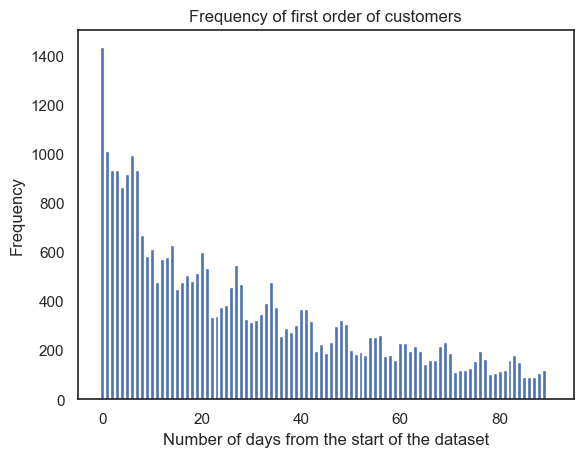

In [38]:
sns.set_theme(style="white")

fig, ax = plt.subplots()
regions = df['first_order'].value_counts()
ax.bar(regions.index, regions.values)
ax.set_title('Frequency of first order of customers')
ax.set_xlabel('Number of days from the start of the dataset')
ax.set_ylabel('Frequency')
plt.show()

Unlike the `first_order`, the `last_order` variable shows that the data increases throughout the graph, with the highest number of last orders occurring on the penultimate day (day 89). We also see a fluctuation in the growth of the data on weekends, where there are small peaks.

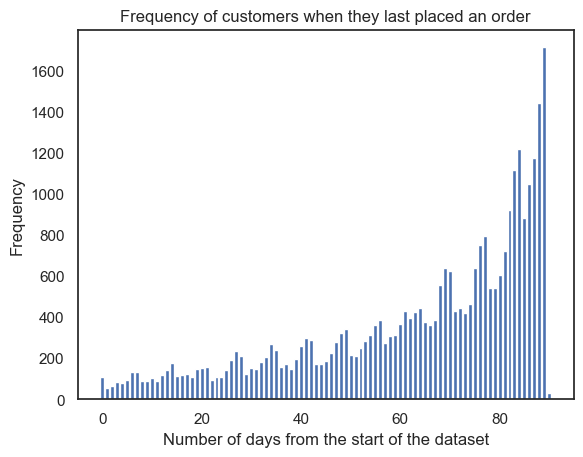

In [39]:
sns.set_theme(style="white")

fig, ax = plt.subplots()
regions = df['last_order'].value_counts()
ax.bar(regions.index, regions.values)
ax.set_title('Frequency of customers when they last placed an order')
ax.set_xlabel('Number of days from the start of the dataset')
ax.set_ylabel('Frequency')
plt.show()

______

>### **2.7 Last Promo** <a class="anchor" id="promo"></a>

In [40]:
df['last_promo'].value_counts()

last_promo
DELIVERY    6286
DISCOUNT    4496
FREEBIE     4358
Name: count, dtype: int64

The most frequent `last_promo` value is DELIVERY accounting for 41.5% of the the feature's values.

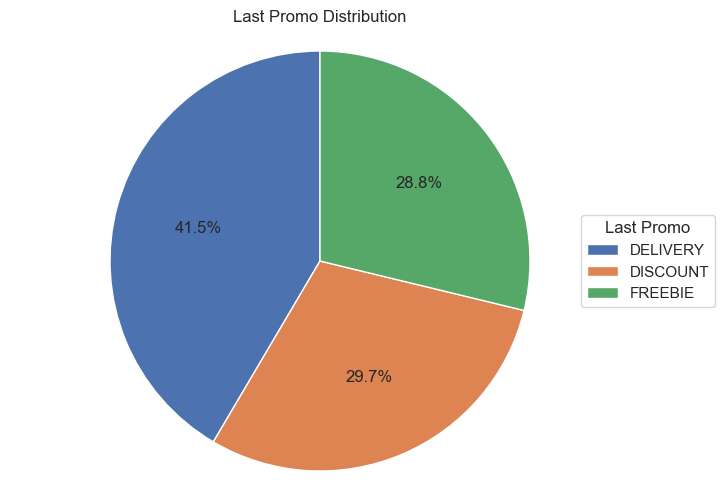

In [41]:
# pie chart for last promo
plt.figure(figsize=(8, 6))

last_promo = df['last_promo'].value_counts()

plt.pie(last_promo, autopct='%1.1f%%', startangle=90)

plt.legend(last_promo.index, title='Last Promo', loc='center right', bbox_to_anchor=(0.65, 0, 0.5, 1))

plt.title('Last Promo Distribution')

plt.axis('equal')

plt.show()

______

>### **2.8 Payment Method** <a class="anchor" id="payment"></a>

In [42]:
df['payment_method'].value_counts()

payment_method
CARD    20161
DIGI     6101
CASH     5626
Name: count, dtype: int64

And the most popular `payment_method` type is `CARD`, accounting for 63.2% of the observations.

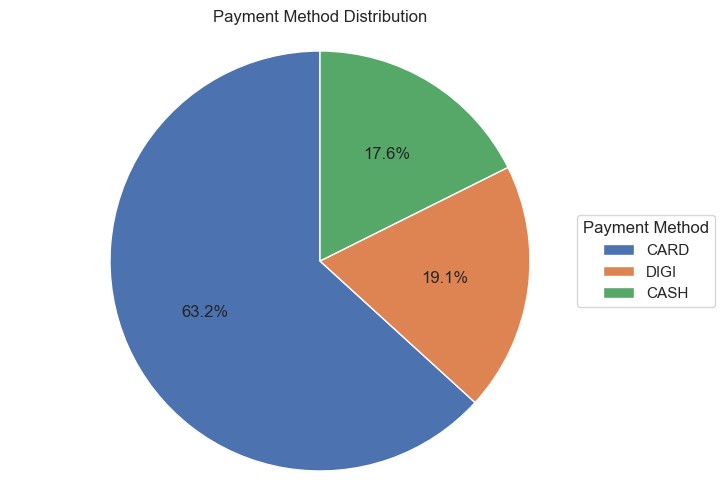

In [43]:
#pie chart for payment method
plt.figure(figsize=(8, 6))

payment_method = df['payment_method'].value_counts()

plt.pie(payment_method, autopct='%1.1f%%', startangle=90)

plt.legend(payment_method.index, title='Payment Method', loc='center right', bbox_to_anchor=(0.65, 0, 0.5, 1))

plt.title('Payment Method Distribution')

plt.axis('equal')

plt.show()

______

>### **2.9 CUI Analysis** <a class="anchor" id="cui_analysis"></a>

In [44]:
cui_cols = df.columns[df.columns.str.startswith('CUI_')]

In [45]:
df[cui_cols].describe()

CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000   31888.000000  31888.000000   
mean       4.880438      9.960451       2.300633      0.801163   
std       11.654018     23.564351       8.479734      6.427132   
min        0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000   
75%        5.660000     11.830000       0.000000      0.000000   
max      280.210000    896.710000     229.220000    326.100000   

       CUI_Chicken Dishes   CUI_Chinese  CUI_Desserts   CUI_Healthy  \
count        31888.000000  31888.000000  31888.000000  31888.000000   
mean             0.768096      1.431218      0.884359      0.950203   
std              3.657273      8.191755      5.259868      5.830590   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000      0.000000      0.000000      0.000000   
75%              0.000000      0.000000      0.000000      0.000000   
max            219.660000    739.730000    230.070000    255.810000   

         CUI_Indian   CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
count  31888.000000  31888.000000  31888.000000       31888.000000   
mean       1.631153      3.233411      2.995379           0.711676   
std        7.443234     11.247990     10.180851           4.536457   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      0.000000           0.000000   
75%        0.000000      0.000000      0.000000           0.000000   
max      309.070000    468.330000    706.140000         275.110000   

          CUI_OTHER  CUI_Street Food / Snacks      CUI_Thai  
count  31888.000000              31888.000000  31888.000000  
mean       2.999913                  3.913253      0.841697  
std        9.768300                 15.548507      4.433047  
min        0.000000                  0.000000      0.000000  
25%        0.000000                  0.000000      0.000000  
50%        0.000000                  0.000000      0.000000  
75%        0.000000                  0.000000      0.000000  
max      366.080000                454.450000    136.380000

With general descriptive statistics about the different type of cuisines we see that:
- _`Asian`_ cuisine has the customer who's spend the most in a single type of cuisine overall (896$), followed by _`Chinese`_ and _`Japanese`_ (over 700$). This values should be followed further considering that Chinese and Japanese are both a type of Asian cuisine.
- Along all the features, the min, 25% and 50% customer have 0$ spent. This might have implications on the distribution of the data that shall be analysed further down the line.
- The cuisine with the lowest avarage is _`Chicken Dishes`_.

In [46]:
# df with only cuisine columns
df_cui = df[cui_cols].copy()

In [47]:
df_cui.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00            0.0       0.0   
5d272b9dcb          12.82       6.39            0.0       0.0   
f6d1b2ba63           9.20       0.00            0.0       0.0   
180c632ed8           0.00      13.70            0.0       0.0   
4eb37a6705          14.57      40.87            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88          0.0           0.0                0.0   
5d272b9dcb         0.00          0.0           0.0                0.0   
f6d1b2ba63         0.00          0.0           0.0                0.0   
180c632ed8        17.86          0.0           0.0                0.0   
4eb37a6705         0.00          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  
customer_id                                                 
1b8f824d5e         0.0                       0.0       0.0  
5d272b9dcb         0.0                       0.0       0.0  
f6d1b2ba63         0.0                       0.0       0.0  
180c632ed8         0.0                       0.0       0.0  
4eb37a6705         0.0                       0.0       0.0

### Correlation
We can see in the correlation matrix that cuisine types are not significantily related amongst themselves.

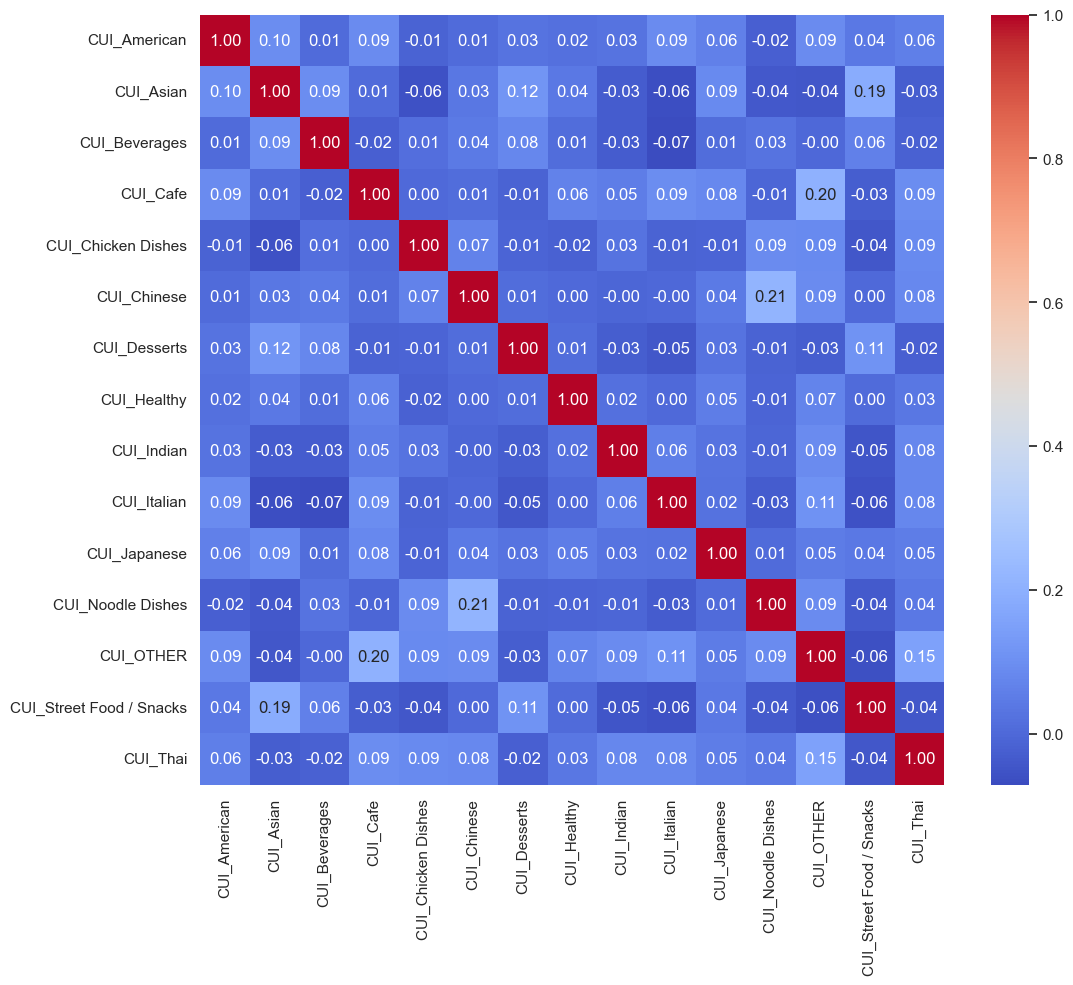

In [48]:
# correlation matrix
cui_corr = df_cui.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cui_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

### Aggregating <a class="anchor" id="cui-agg"></a>

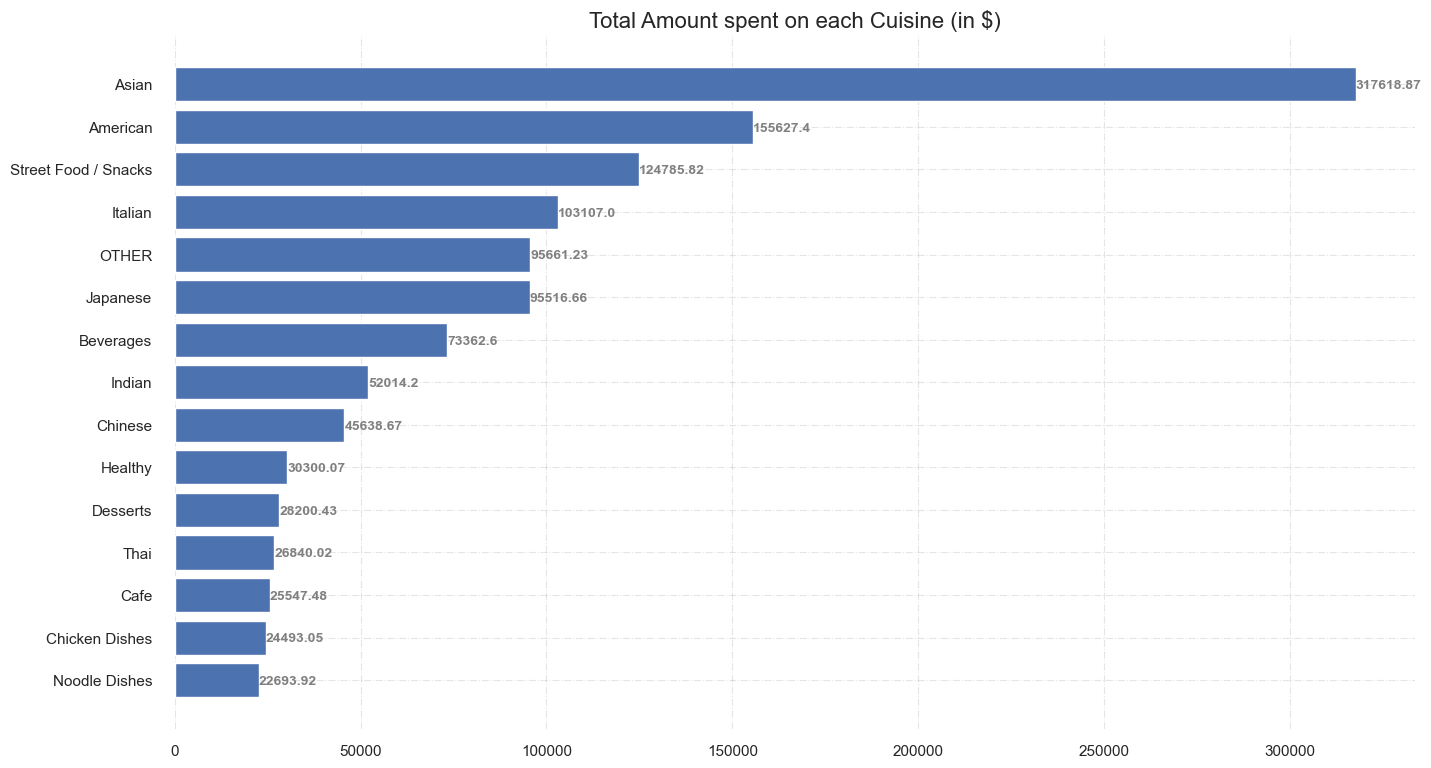

In [49]:
# sum of cuisine values
cui_sum = df[cui_cols].sum().sort_values(ascending=False)

# remove CUI_ prefix
cui_sum.index = cui_sum.index.str.replace("CUI_", "")

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot (use cui_sum.index for names and cui_sum.values for totals)
ax.barh(cui_sum.index, cui_sum.values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.8,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars (put total values at the end of each bar)
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Total Amount spent on each Cuisine (in $)',
             loc ='center', fontsize=16)

# Show Plot
plt.show()

By doing the sum of the values spent by every customer we can now observe the cuisines in which customers spent more money overall is the _`Asian`_ cuisine by a large amount, and the cuisine with the least amount of money spent overall is _`Noodle Dishes`_.

### Individual Customers 
Let's see what cuisine type has the most individual customer, i.e, customer that have previously ordered the cuisine type.

In [50]:
# count of customer for each cuisine
cui_customer_count = (df_cui > 0).sum().sort_values(ascending=False)
cui_customer_count.index.str.replace("CUI_", "")

Index(['Asian', 'American', 'OTHER', 'Italian', 'Japanese', 'Beverages',
       'Street Food / Snacks', 'Chinese', 'Indian', 'Chicken Dishes', 'Thai',
       'Noodle Dishes', 'Healthy', 'Desserts', 'Cafe'],
      dtype='object')

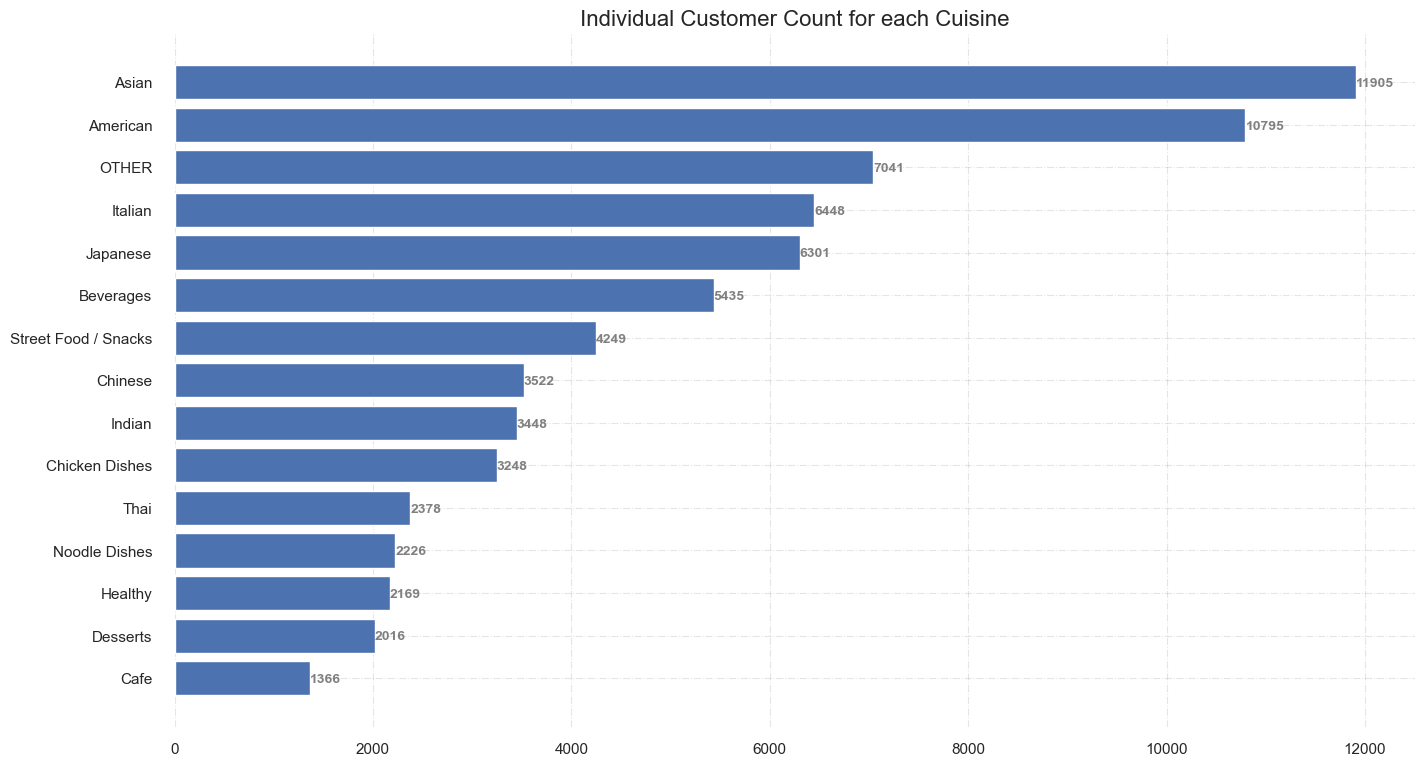

In [51]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# 
ax.barh(cui_customer_count.index.str.replace("CUI_", ""), cui_customer_count.values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.8,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars (put total values at the end of each bar)
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Individual Customer Count for each Cuisine',
             loc ='center', fontsize=16)

# Show Plot
plt.show()


With this graph we noticed that _`Street Food/Snacks`_ seem to have fewer individual customers, considering the total amount of money spent in this specific type of food. We can verify that by checking the average amount of money spent by customers in each category, considering. This differs from the first mean calculated in the Initial Analysis section because here customers that spent 0$ are not considered.

In [52]:
cui_customer_count.sort_index()
cui_customer_count.index = cui_customer_count.index.str.replace("CUI_", "")

# average amount spent on each cuisine
cui_avg = cui_sum / cui_customer_count

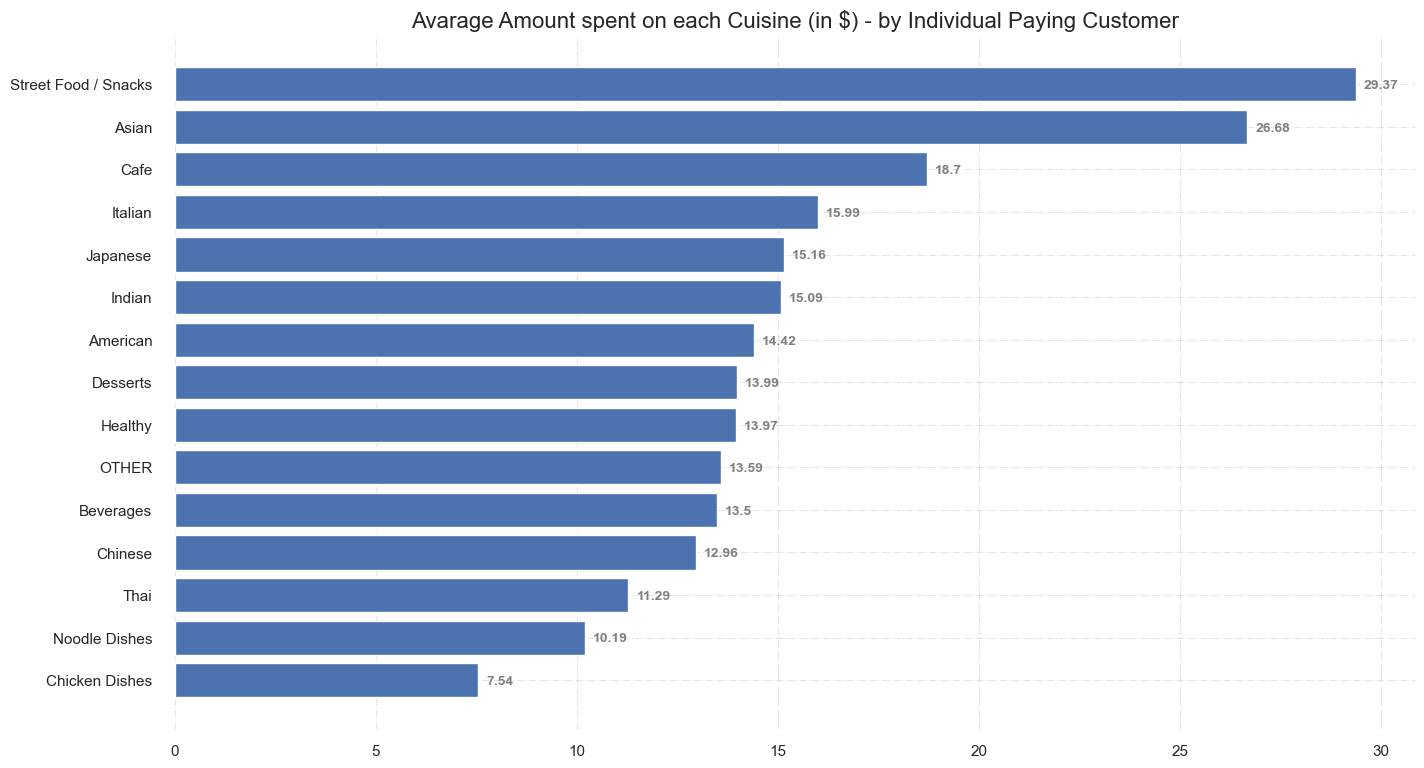

In [53]:
cui_avg = cui_avg.sort_values(ascending=False)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# 
ax.barh(cui_avg.index, cui_avg.values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.8,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars (put total values at the end of each bar)
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Avarage Amount spent on each Cuisine (in $) - by Individual Paying Customer',
             loc ='center', fontsize=16)

# Show Plot
plt.show()

Our previous theory is verified by this graph. We can see here that _`Street Food/Snacks`_ has the biggest average amount spent considering it's paying customers only. This relation can be seen better when we plot customer count agains average spent per customer.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22600\636537943.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cui_avg_sorted.index, rotation=45)


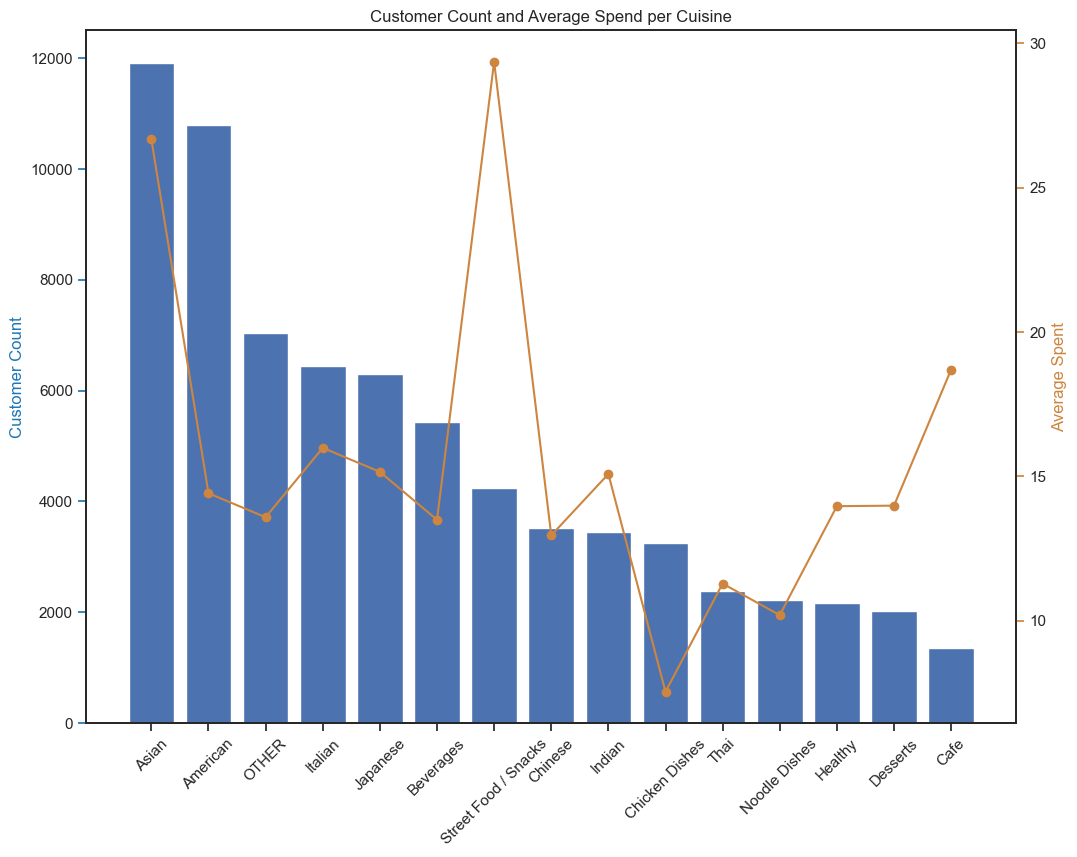

In [54]:
sns.set_style('ticks')

# sort  cui_avg by cui_customer_count index to match the order of the bars
cui_avg_sorted = cui_avg.reindex(cui_customer_count.index)

fig, ax1 = plt.subplots(figsize=(12, 9))

# plot customer count (cui_customer_count) on the left axis
ax1.bar(cui_customer_count.index, cui_customer_count.values, label='Customer Count')
ax1.set_ylabel('Customer Count', color='tab:blue')
ax1.tick_params(axis='y',color='tab:blue')

# plot average spend (cui_avg) on the right axis
ax2 = ax1.twinx()
ax2.plot(cui_avg_sorted.index, cui_avg_sorted.values, color='peru', marker='o')
ax2.set_ylabel('Average Spent', color='peru')
ax2.tick_params(axis='y',color='peru')

# set title and x-axis and rotate
plt.title('Customer Count and Average Spend per Cuisine')
ax1.set_xticklabels(cui_avg_sorted.index, rotation=45)

plt.show()


### Outliers <a class="anchor" id="cui-out"></a>

If we consider all the customers independent if they spent or not in a certain type of cuisine, as we saw in the basic statistics, the customers who haven't spent will skew the data results in an apperant large presence of outliers. Here is an example:

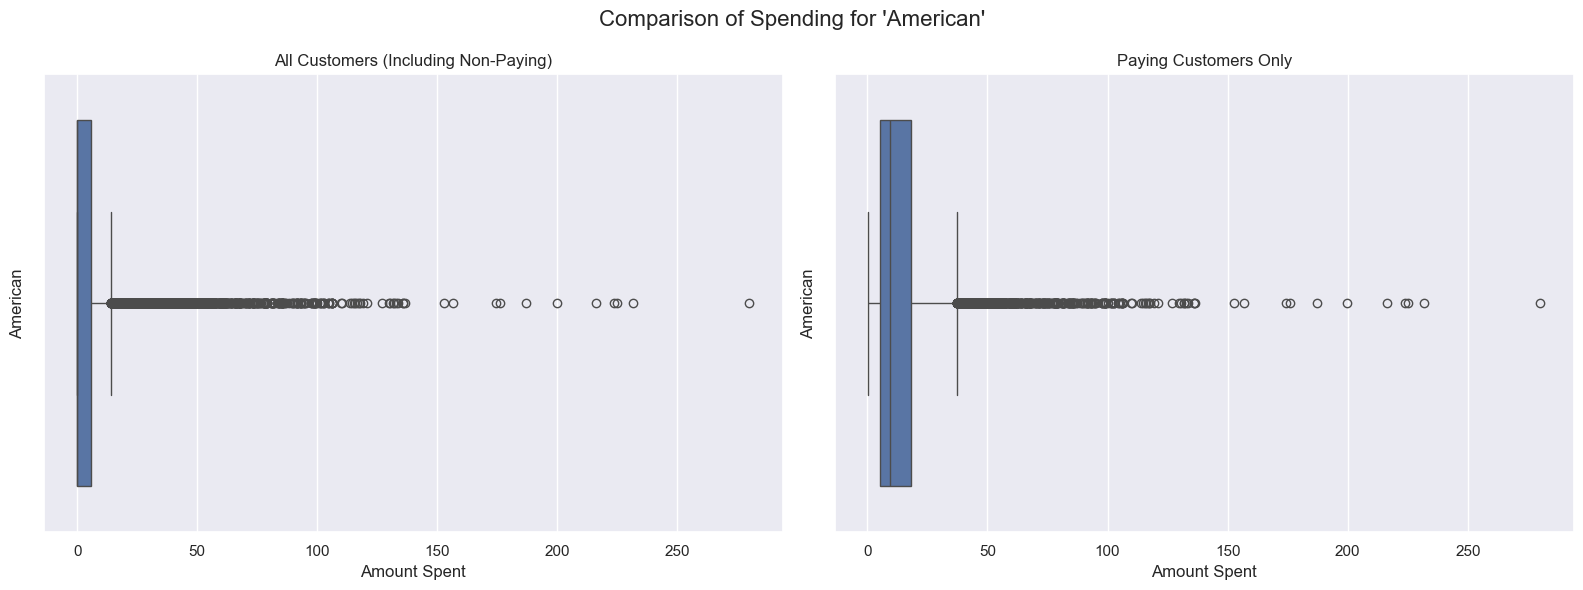

In [55]:
# Set the plotting style
sns.set()

# plot the first feature for example
feat = cui_cols[0]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), tight_layout=True)

# first boxplot for all customers (including non-paying)
sns.boxplot(x=df_cui[feat], orient='h', ax=axes[0])
axes[0].set_title('All Customers (Including Non-Paying)')
axes[0].set_xlabel('Amount Spent')
axes[0].set_ylabel(feat.replace("CUI_", ""))

# second subplot boxplot for paying customers only
paying_customer = df_cui[df_cui[feat] > 0][feat]
sns.boxplot(x=paying_customer, orient='h', ax=axes[1])
axes[1].set_title('Paying Customers Only')
axes[1].set_xlabel('Amount Spent')
axes[1].set_ylabel(feat.replace("CUI_", ""))

plt.suptitle(f"Comparison of Spending for '{feat.replace("CUI_", "")}'", fontsize=16)
plt.show()

This behaviour can be observed throughout all the CUIs. So in order to have a better understanding of outliers we should consider only customers that have actually bought products related to that category.

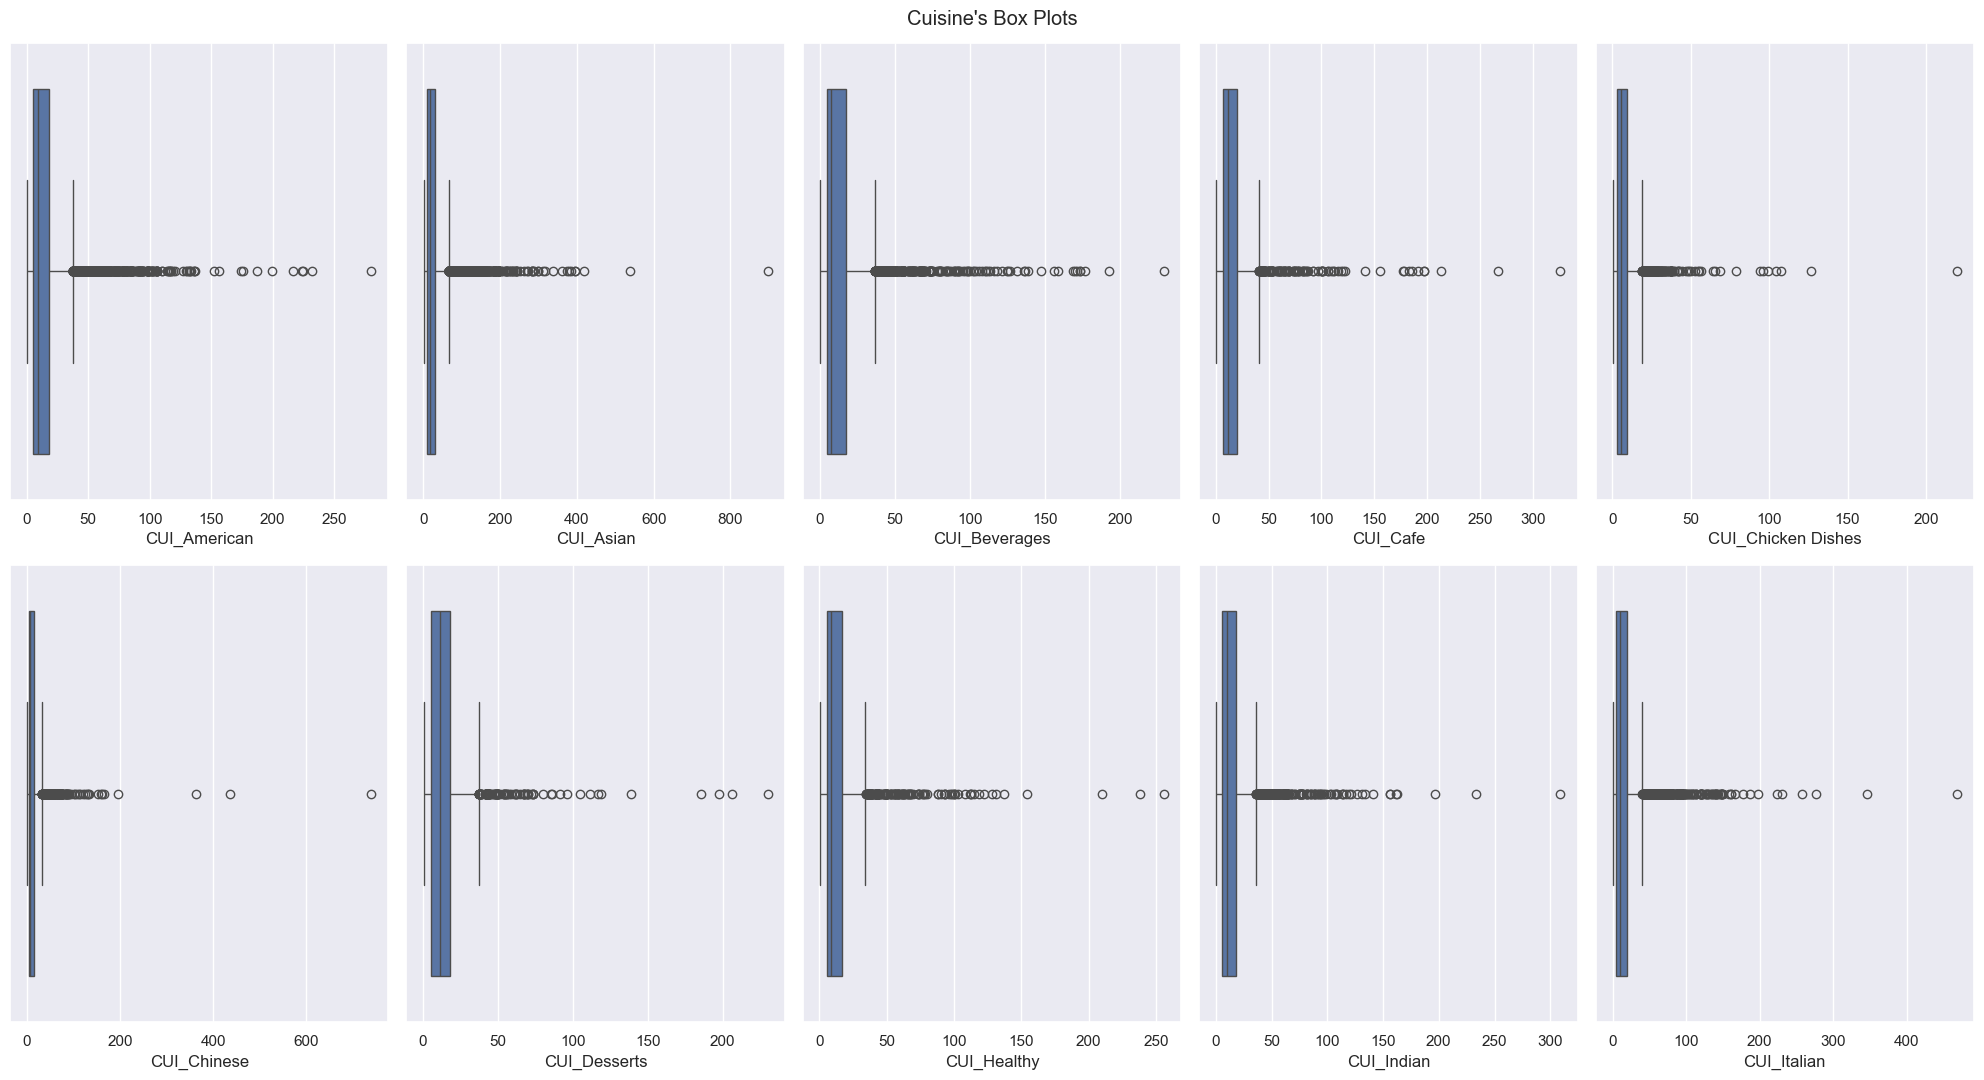

In [56]:
# plot all cuisine boxplots

sp_rows = 2
sp_cols = 5


fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )


# iterate across axes objects and associate each boxplot. 
for ax, feat in zip(axes.flatten(), cui_cols):

    # get only the paying customers
    paying_customers = df_cui[df_cui[feat] > 0][feat]

    sns.boxplot(x=paying_customers, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Cuisine's Box Plots"

plt.suptitle(title)


plt.show()

We can still see a heavy presence of outliers throughout all the cuisine types.

______

>### **2.10 Days of the week** <a class="anchor" id="dow"></a>

The plot below illustrates that the total number of orders for each day of the week is relatively consistent, with _`Saturday`_ being the most popular day for orders, followed by _`Thursday`_ and _`Friday`_.

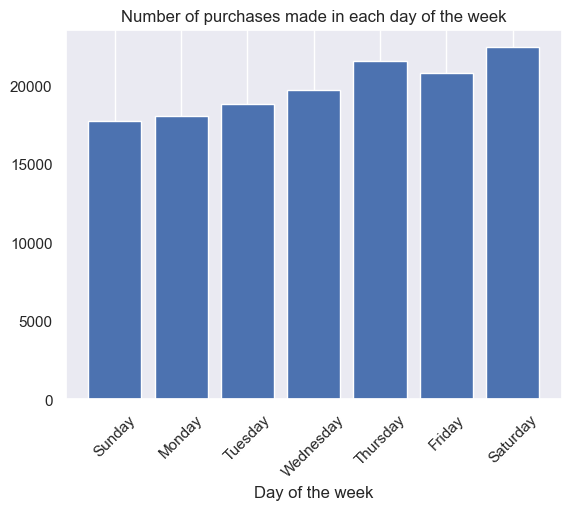

In [57]:
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Calculate the sum for each specified column
column_sums = df[columns_to_sum].sum()

week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.bar(week_days, column_sums.values,)
plt.title("Number of purchases made in each day of the week")
plt.xlabel("Day of the week")
plt.ylabel("")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

________

>### **2.11 Hours of orders** <a class="anchor" id="hours"></a>

There are 24 columns that contain information about the times orders were placed. Each column contains a specific time and records the number of orders that were placed at that time by the customer during the three months of the data set.

In [58]:
hours_df = df[df.columns[-24:]]

The `HR_0` column does not contain any recorded orders, although this column contains 1,165 missing values. The values ​​in this column are of floating type.

In [59]:
hours_df['HR_0'].value_counts()

HR_0
0.0    30723
Name: count, dtype: int64

### Charts for the Hours

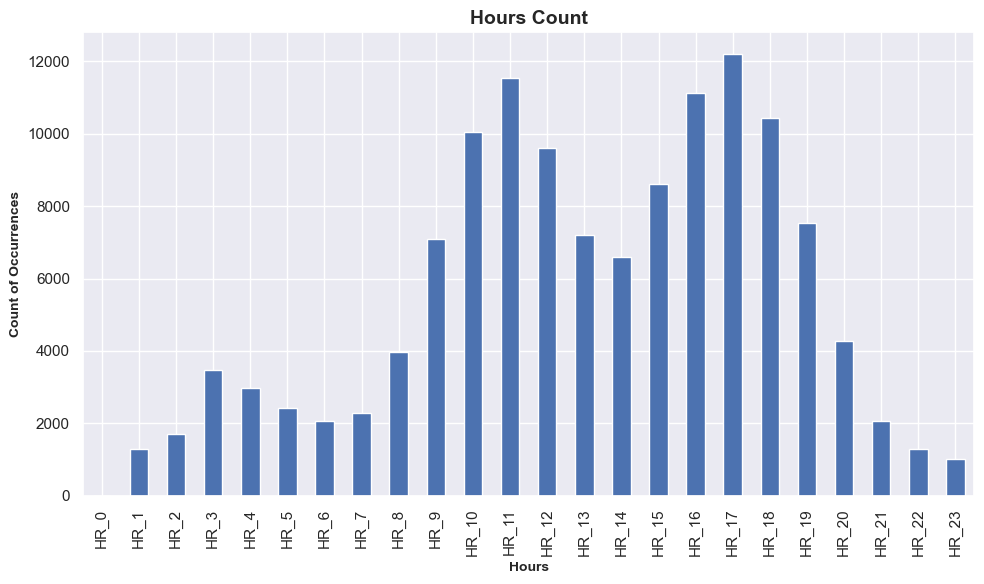

In [60]:
plt.figure(figsize=(10, 6))

# Count the occurrences
Hours_counts = hours_df.dropna().sum()
Hours_counts.plot(kind='bar')

# Adjusting the title and labels
plt.title("Hours Count", fontsize=14, weight='bold')
plt.ylabel('Count of Occurrences', fontsize=10, weight='bold')
plt.xlabel('Hours', fontsize=10, weight='bold')


plt.tight_layout()
plt.show()

When checking the total number of orders in made in each hour we can see that `11 AM` and `17 PM` present the highest numbers.

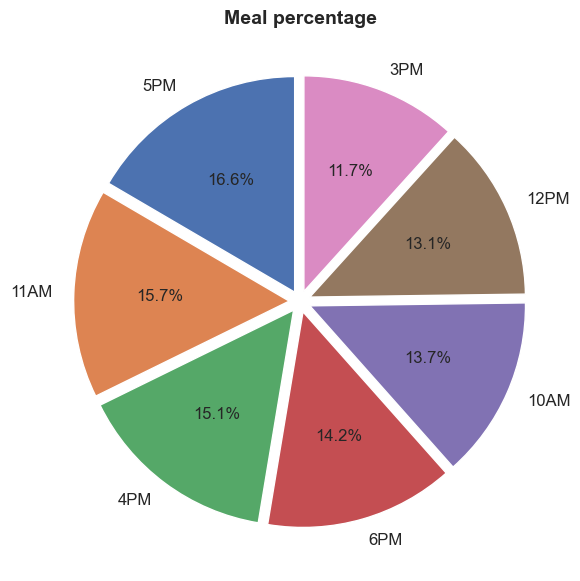

In [61]:
hours_plot_counts = Hours_counts.copy()

# Replaces the name of the columns with the name of the hours corresponding to each one.
hours_plot_counts = hours_plot_counts.rename(index = {'HR_0':'12AM', 'HR_1':'1AM', 'HR_2':'2AM', 'HR_3':'3AM', 'HR_4':'4AM', 'HR_5':'5AM',
                                                        'HR_6':'6AM', 'HR_7':'7AM', 'HR_8':'8AM', 'HR_9':'9AM', 'HR_10':'10AM', 'HR_11':'11AM',
                                                        'HR_12':'12PM', 'HR_13':'1PM', 'HR_14':'2PM', 'HR_15':'3PM', 'HR_16':'4PM', 'HR_17':'5PM',
                                                        'HR_18':'6PM', 'HR_19':'7PM', 'HR_20':'8PM', 'HR_21':'9PM', 'HR_22':'10PM', 'HR_23':'11PM'
                                                        })

hours_plot_counts = hours_plot_counts.sort_values(ascending=False).head(7)

plt.figure(figsize=(7, 7))
hours_plot_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, 
                       explode=[0.05] * len(hours_plot_counts),)

plt.title("Meal percentage", fontsize=14, weight='bold')
plt.show()

If we analyze the orders placed during certain meal times we can see that it is at `Afternoon Snack` time that there are the largest number of orders and then lunch time.

In [62]:
hours_meal=pd.DataFrame()
hours = hours_df.fillna(0).astype(int)

hours_meal['Early morning'] = hours[['HR_1','HR_2','HR_3','HR_4','HR_5']].sum(axis=1) # 1-5
hours_meal['Breakfast'] = hours[['HR_6','HR_7','HR_8','HR_9','HR_10']].sum(axis=1) # 6-10
hours_meal['Lunch'] = hours[['HR_11','HR_12','HR_13','HR_14']].sum(axis=1) # 11-14
hours_meal['Afternoon Snack'] = hours[['HR_15','HR_16','HR_17','HR_18']].sum(axis=1) # 15-18
hours_meal['Dinner'] = hours[['HR_19','HR_20','HR_21']].sum(axis=1) # 19-21
hours_meal['Supper'] = hours[['HR_22','HR_23','HR_0']].sum(axis=1) # 22-0

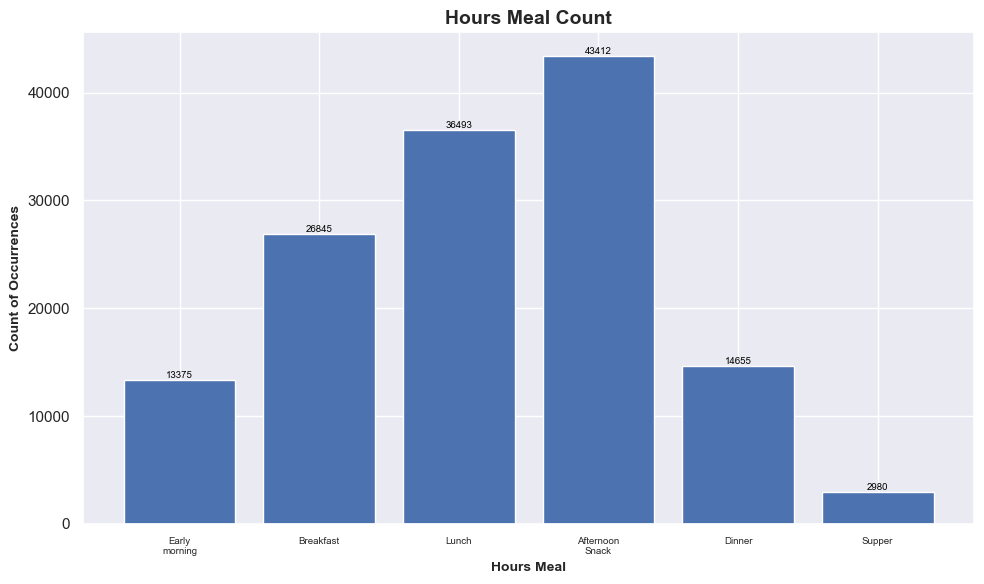

In [63]:
# Count the occurrences of unique values
hours_meal_counts = hours_meal.sum()

# Function to wrap labels to fit in multiple lines
def wrap_labels(labels, width=11):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Create the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(hours_meal_counts.index, hours_meal_counts.values)

# Adjusting the title and labels
plt.title("Hours Meal Count", fontsize=14, weight='bold')
plt.ylabel('Count of Occurrences', fontsize=10, weight='bold')
plt.xlabel('Hours Meal', fontsize=10, weight='bold')

# Wrap the x-tick labels and set them
wrapped_labels = wrap_labels(hours_meal_counts.index, width=11)
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0, fontsize=7)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()

Most of the orders were made in the afternoon and during lunch, resulting in 62.1% of the orders being placed after midday.

<Figure size 700x700 with 0 Axes>

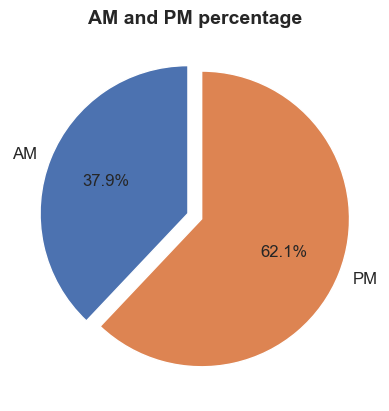

In [64]:
AM_PM = pd.DataFrame()
AM_PM['AM'] = [hours_df.iloc[:, :12].sum().sum()]  # AM hours sum
AM_PM['PM'] = [hours_df.iloc[:, 12:].sum().sum()]

# Transpose the DataFrame to have 'AM' and 'PM' as rows
AM_PM = AM_PM.T
AM_PM.columns = ['Count']

# Plot the pie chart
plt.figure(figsize=(7, 7))
AM_PM.plot(kind='pie', y='Count', autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, 
           explode=[0.05] * len(AM_PM), legend=False)

plt.title("AM and PM percentage", fontsize=14, weight='bold')
plt.ylabel('')  # Hide the y-label
plt.show()

_____

># **3. Bivariate Feature Analysis** <a class="anchor" id="bi_analysis"></a>

>## 3.1 Feature Correlation <a class="anchor" id="feature_corr"></a>

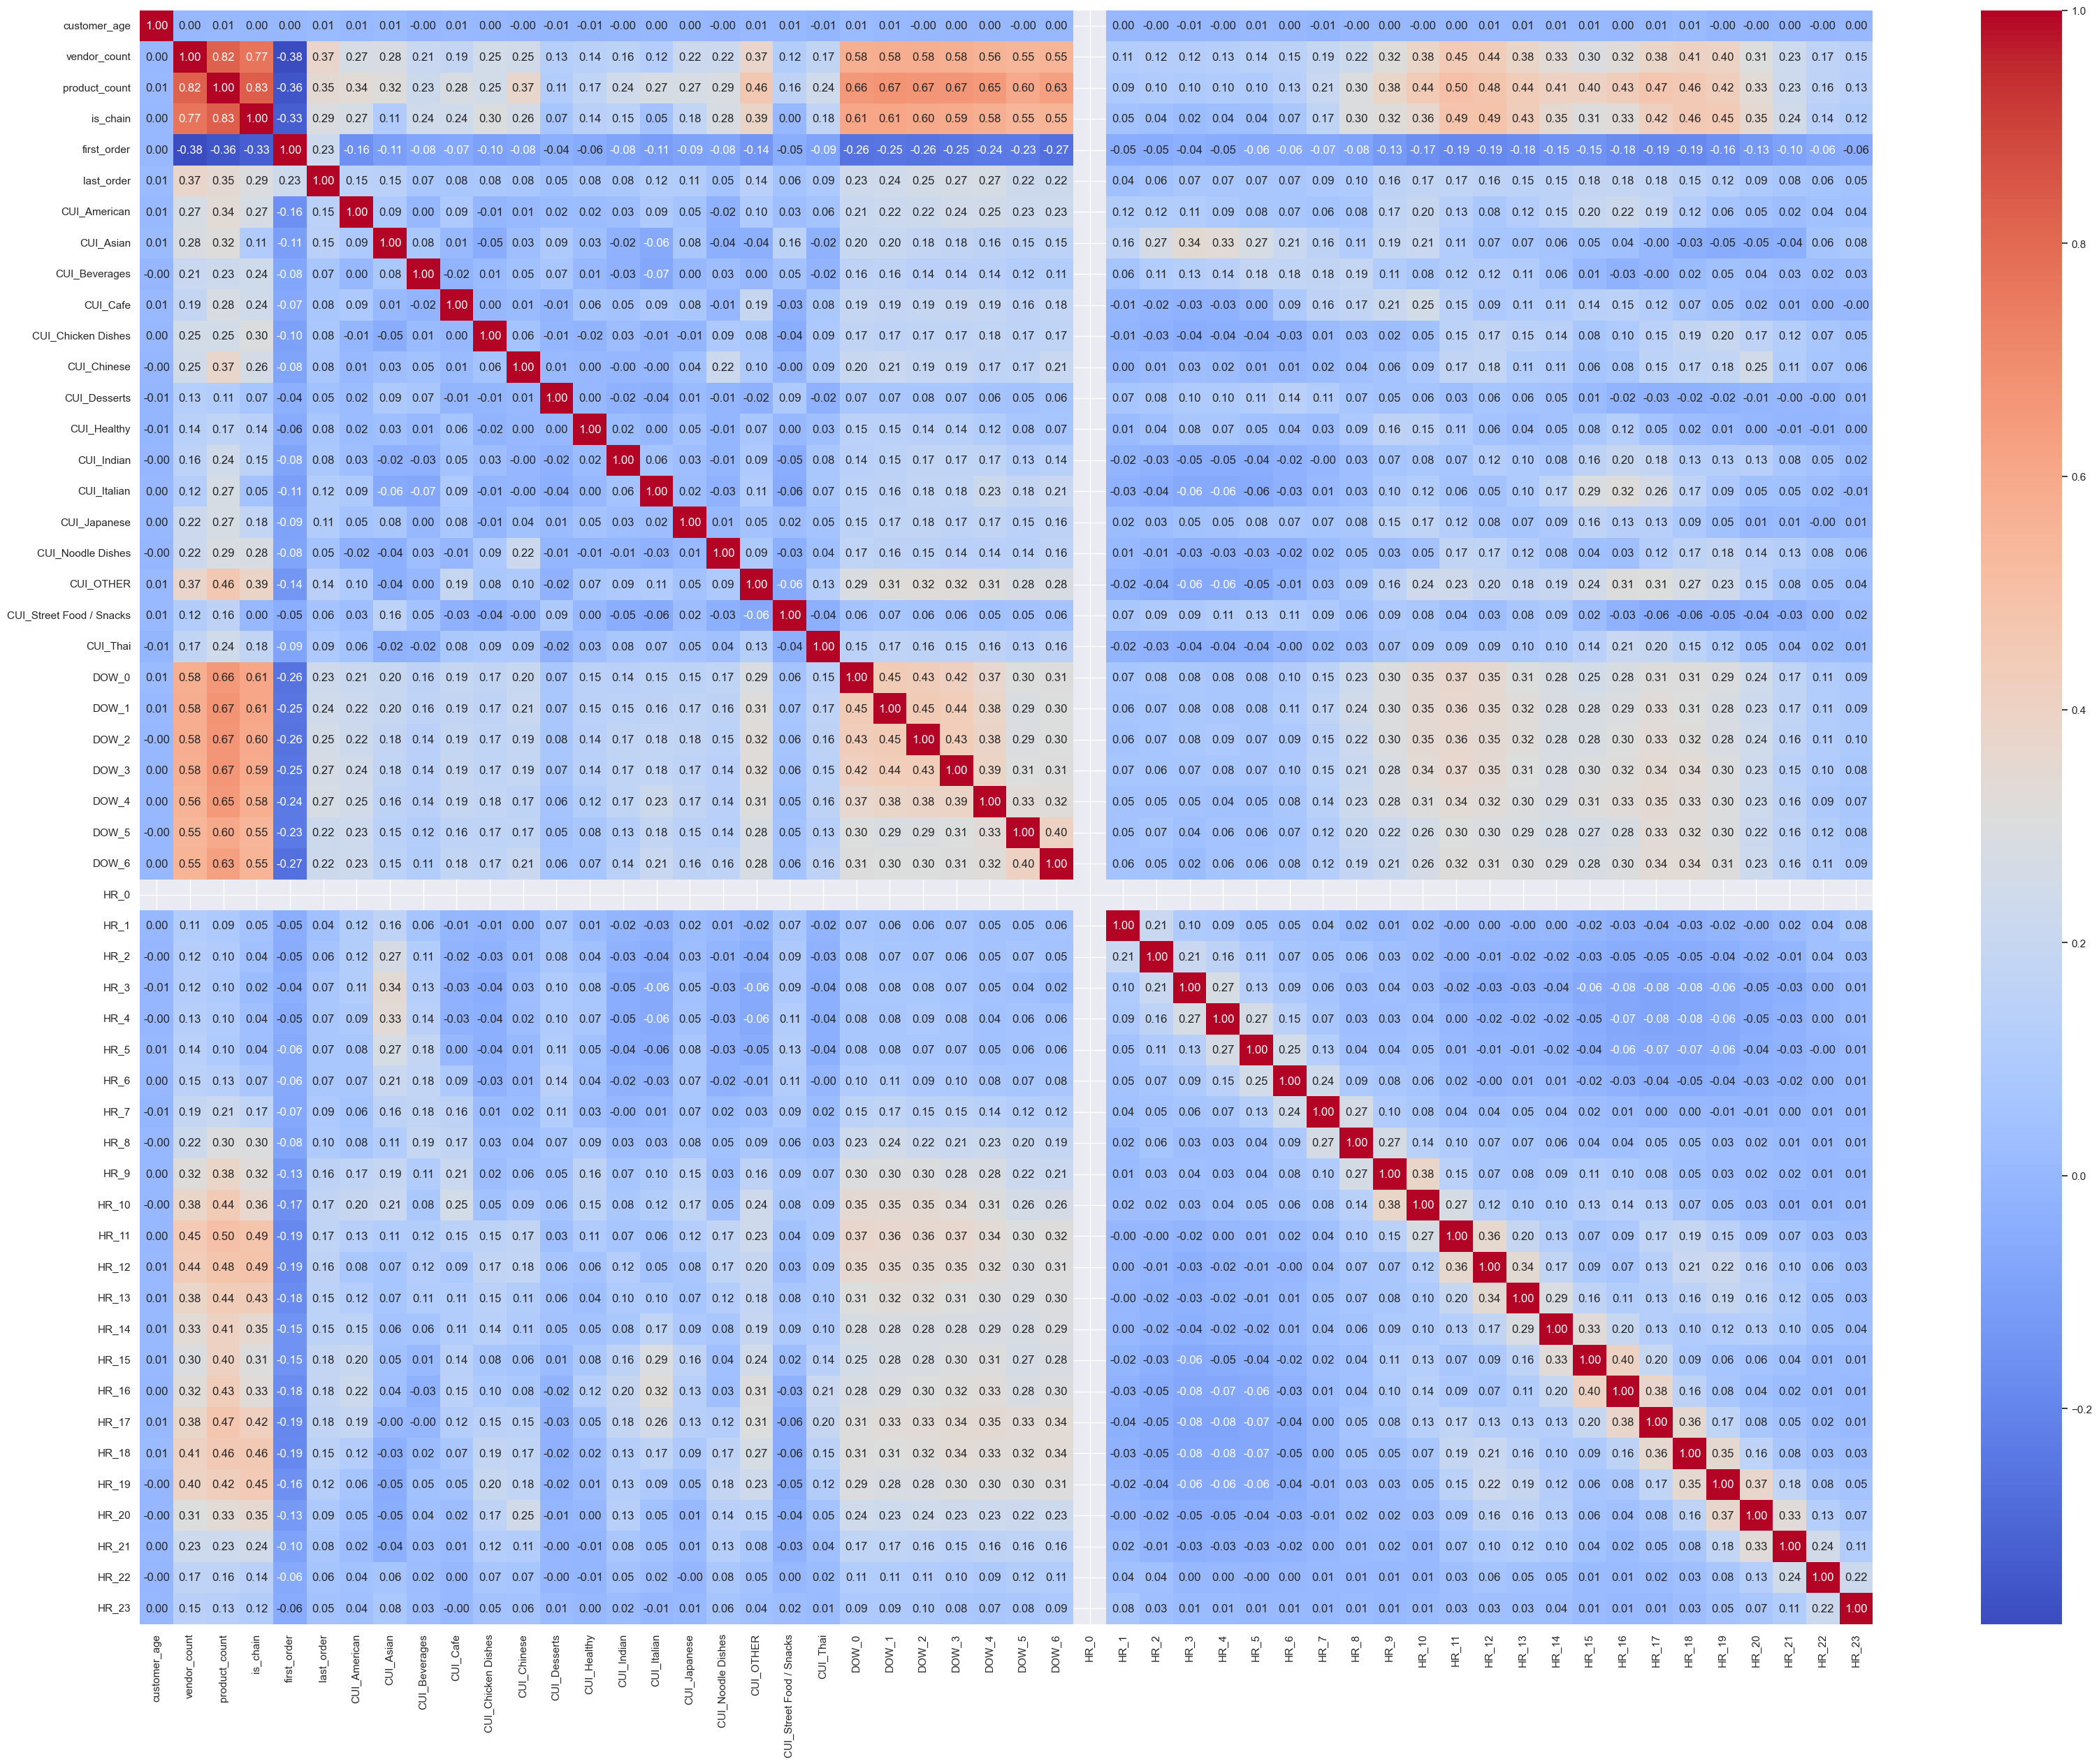

In [65]:
correlation = df.select_dtypes(include=['int', 'float']).replace('-', np.nan)
correlation = correlation.dropna()

correlation = correlation.corr(method='pearson')
plt.figure(figsize=(40, 30))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In the correlation heatmap we can see three features with high pearson correlation:
* _`is_chain`_ and _`product_count`_
* _`is_chain`_ and _`vendor_count`_
* _`vendor_count`_ and _`product_count`_

>## 3.2 Vendor Count and Is Chain <a class="anchor" id="vendor_chain"></a>

_`vendor_count`_ indicates the number of vendors the customer has orderem from, when this count increases so does _`is_chain`_ but the points are more dispersed around the line.

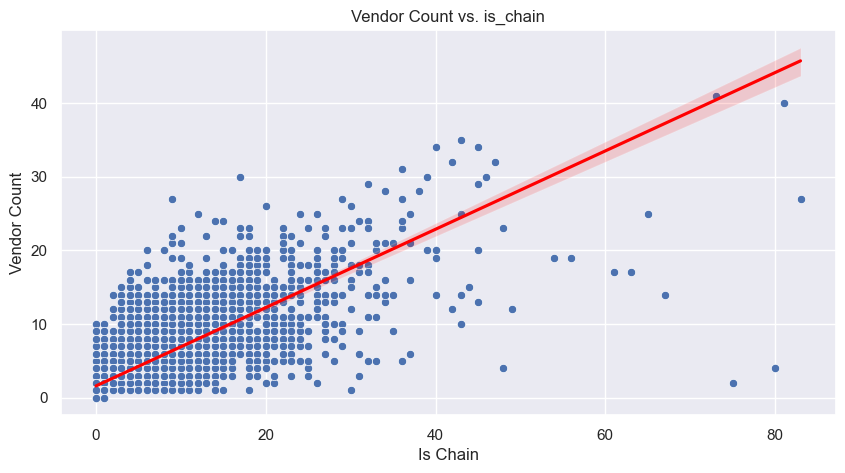

In [66]:
cols_to_plot = ['is_chain', 'vendor_count', 'product_count']

# Scatter Plot: Vendor Count vs. is_chain
plt.figure(figsize=(10, 5))
sns.scatterplot(x='is_chain', y='vendor_count', data=df)
sns.regplot(x='is_chain', y='vendor_count', data=df, scatter=False, color='red')
plt.title("Vendor Count vs. is_chain")
plt.xlabel("Is Chain")
plt.ylabel("Vendor Count")
plt.show()

>## 3.3 Product Count and Is Chain <a class="anchor" id="product_chain"></a>

_`product_count`_ and _`is_chain`_ also present a high correlation, this makes sense when we consider that as the number of chain restaurants the customer has orderem from increases, so should the product count

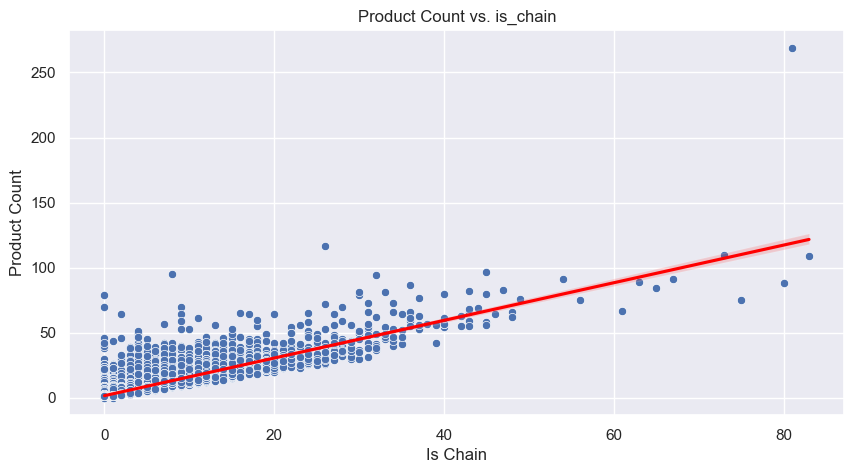

In [67]:
# Scatter Plot: Product Count vs. is_chain
plt.figure(figsize=(10, 5))
sns.scatterplot(x='is_chain', y='product_count', data=df)
sns.regplot(x='is_chain', y='product_count', data=df, scatter=False, color='red')
plt.title("Product Count vs. is_chain")
plt.xlabel("Is Chain")
plt.ylabel("Product Count")
plt.show()

>## 3.4 Vendor Count and Product Count <a class="anchor" id="vendor_product"></a>

The same logic can be applied to justify the high correlation between _`vendor_count`_ and _`product_count`_, as the number of unique vendor increases so should the product count.

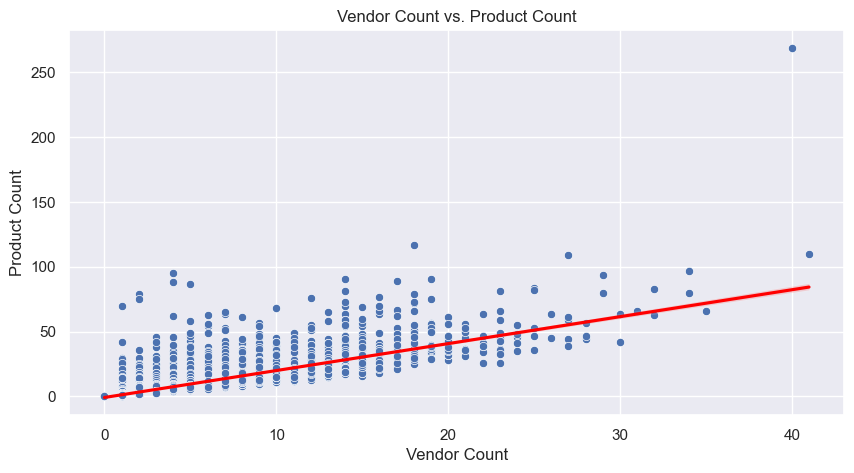

In [68]:

# Scatter Plot: Vendor Count vs Product Count
plt.figure(figsize=(10, 5))
sns.scatterplot(x='vendor_count', y='product_count', data=df)
sns.regplot(x='vendor_count', y='product_count', data=df, scatter=False, color='red')
plt.title("Vendor Count vs. Product Count")
plt.xlabel("Vendor Count")
plt.ylabel("Product Count")
plt.show()

>## 3.5 Customer Age and Food Preference <a class="anchor" id="age_food"></a>

Inline with the most popular cuisine type and the vast majority of our customer base, we can see a lot of money was spent in _`Asian`_ by customers between 19-30.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22600\2609833999.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cuisine_counts = df_age_group.groupby('age_group')[cui_cols].sum().round().astype(int)


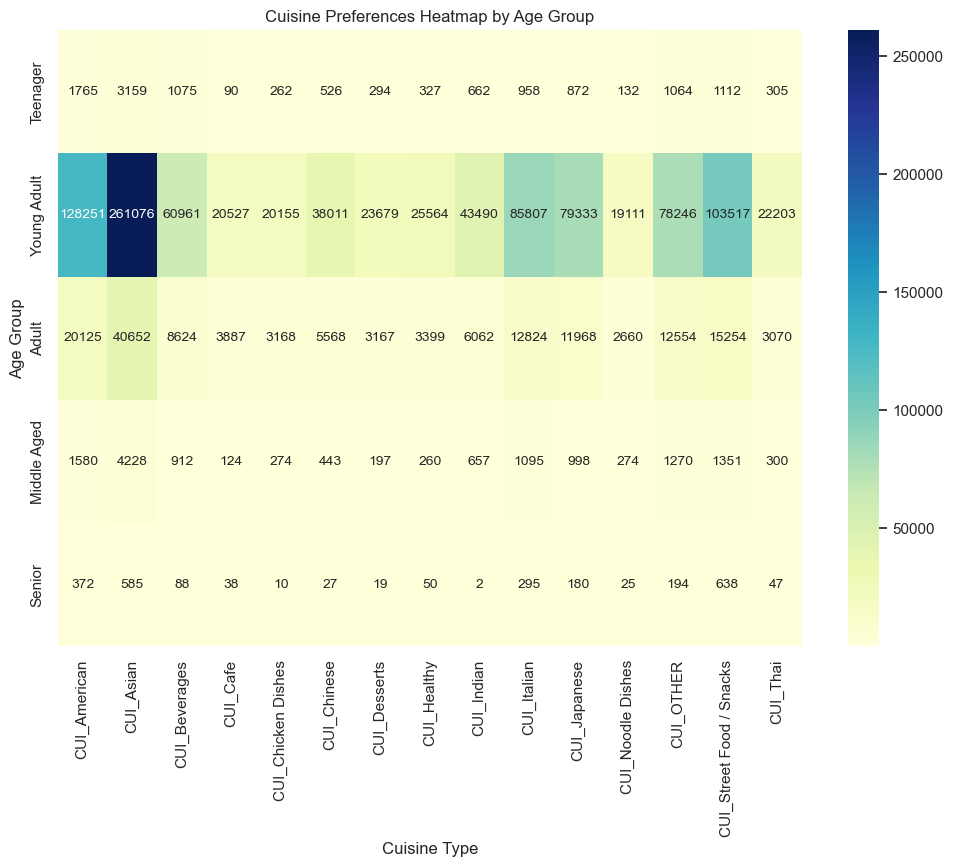

In [69]:
#Age Group

bins = [12, 18, 35, 50, 65, 100]
labels = ['Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']

df_age_group = df.copy()
df_age_group['age_group'] = pd.cut(df_age_group['customer_age'], bins=bins, labels=labels, right=False)

age_cuisine_counts = df_age_group.groupby('age_group')[cui_cols].sum().round().astype(int) 
# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(age_cuisine_counts, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}) 
plt.title('Cuisine Preferences Heatmap by Age Group')
plt.xlabel('Cuisine Type')
plt.ylabel('Age Group')
plt.show()

____


>## 3.6 Customer age and most frequently used Payment Method <a class="anchor" id="age_payment"></a>

It is possible to observe in the graph below that _`Card`_ seems to be the most frequent payment method throughout all ages.

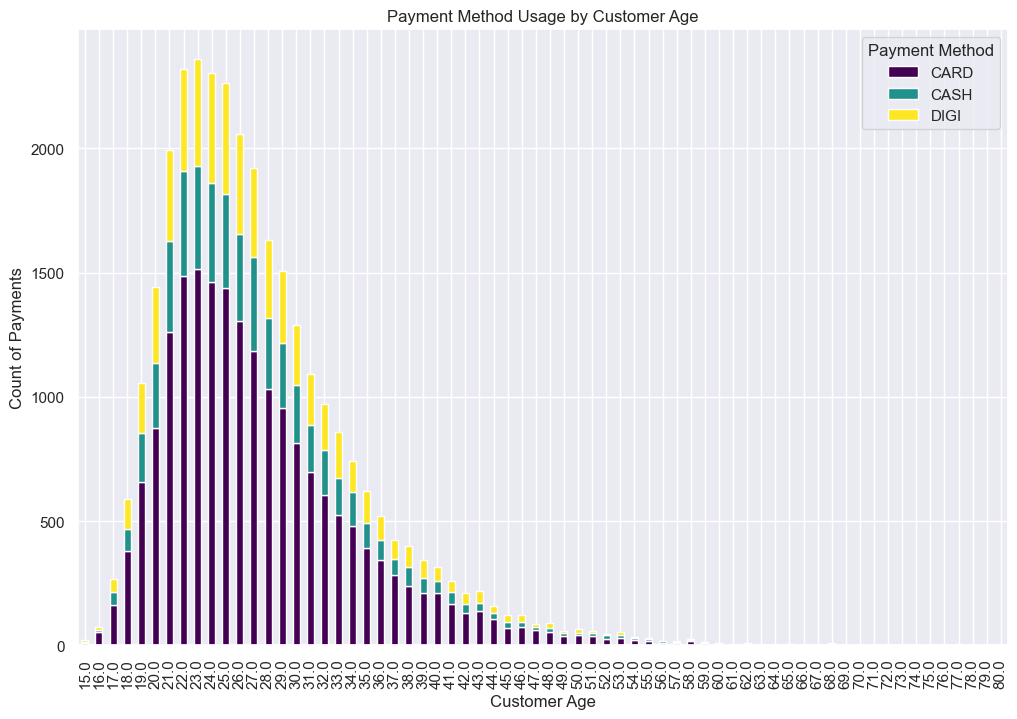

In [70]:
age_payment_counts = df.groupby(['customer_age', 'payment_method']).size().unstack().fillna(0)

age_payment_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Payment Method Usage by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Count of Payments')
plt.legend(title='Payment Method')
plt.show()

People aged between 21 and 27 use cards as a payment method for the vast majority of purchases, but they end up being the ones who also use other methods the most since they are also the ones who order the most.

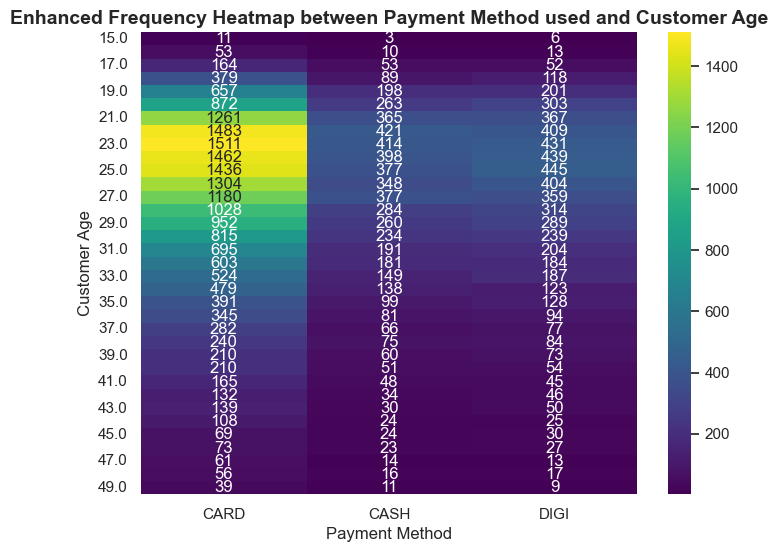

In [71]:
df_for_plot = df.drop_duplicates()

# Get a dataframe for plotting with less outliers 
df_plot = df_for_plot[df_for_plot['customer_age'] < 50]

# Create a frequency table using pivot_table
heatmap_data = df_plot.pivot_table(index='customer_age', columns='payment_method', aggfunc='size', fill_value=0)

# Enhanced heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data,fmt="g", annot=True, cmap="viridis")

plt.title("Enhanced Frequency Heatmap between Payment Method used and Customer Age", fontsize=14, weight='bold')
plt.xlabel("Payment Method")
plt.ylabel("Customer Age")
plt.show()

____

>## 3.7 Customer Age and number of orders for Days of the Week <a class="anchor" id="age_days"></a>

The frequency of orders throughout the week seems to be very constant and the frequency increases accordingly to the age group were most of the customers are situated.

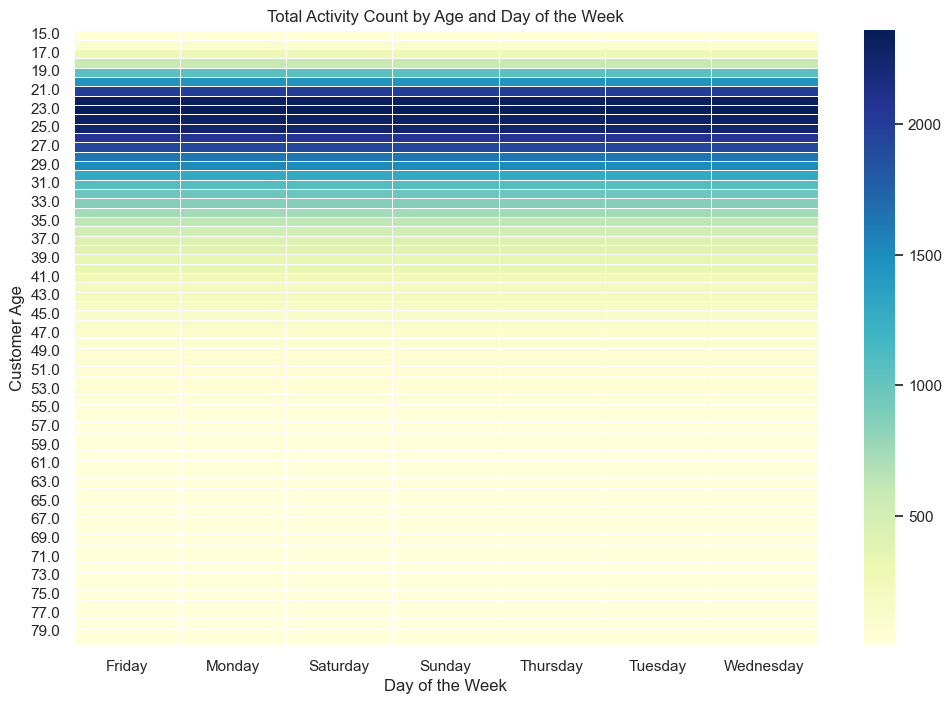

In [72]:
df_long = df.melt(id_vars='customer_age', value_vars=[f'DOW_{i}' for i in range(7)], 
                  var_name='day_of_week', value_name='count')

# Replace 'dow_0' to 'dow_6' with actual day names for better readability
day_mapping = {f'DOW_{i}': day for i, day in enumerate(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])}
df_long['day_of_week'] = df_long['day_of_week'].map(day_mapping)

age_day_counts = df_long.groupby(['customer_age', 'day_of_week']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(age_day_counts, cmap='YlGnBu', annot=False, fmt="d", linewidths=0.5)
plt.title('Total Activity Count by Age and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Customer Age')
plt.show()

___

>## 3.8 Customer Age and number of orders for Hours <a class="anchor" id="age_hours"></a>

The frequency of orders throughout the hours seems to be very constant and the frequency increases accordingly to the age group were most of the customers are situated.

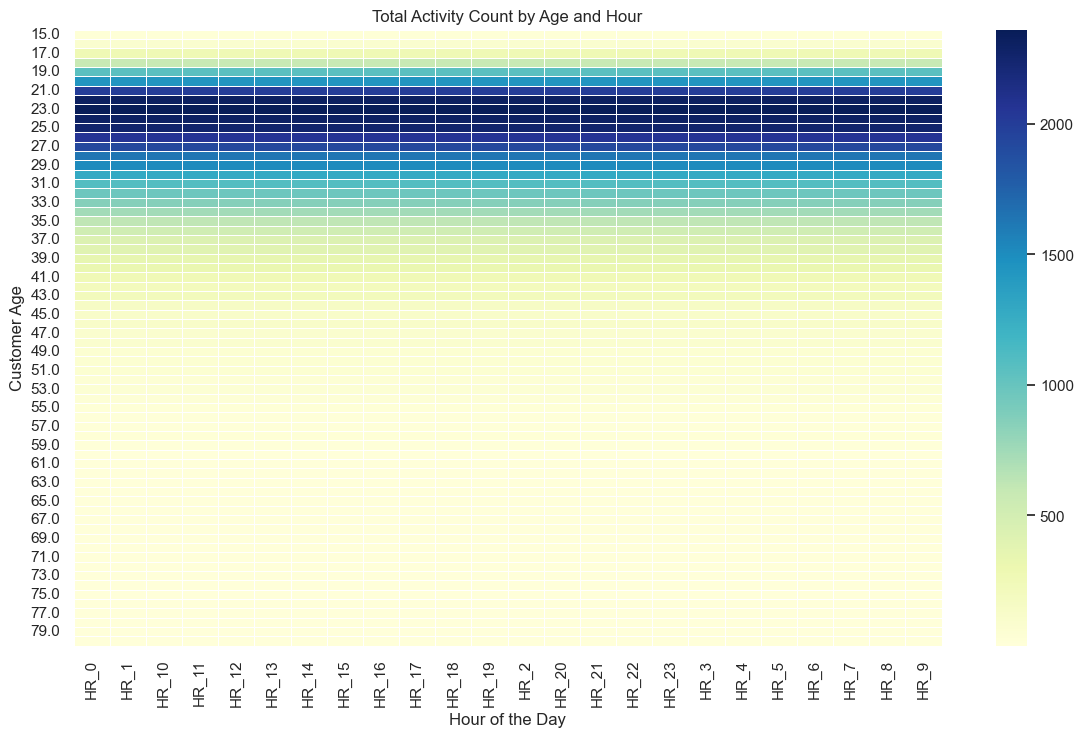

In [73]:
df_long_hours = df.melt(id_vars='customer_age', value_vars=[f'HR_{i}' for i in range(24)], 
                        var_name='hour', value_name='count')

# Group by age and hour, calculating total counts
age_hour_counts = df_long_hours.groupby(['customer_age', 'hour']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(age_hour_counts, cmap='YlGnBu', annot=False, fmt="d", linewidths=0.5)
plt.title('Total Activity Count by Age and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Customer Age')
plt.show()

______

>## 3.9 Customer Age and number of orders from Restaurant Chains <a class="anchor" id="age_chain"></a>

In general, the number of orders from chain restaurants does not usually exceed 15/20 per customer. Through the graphs it is possible to see that customers who place a greater number of orders in chain restaurants tend to be younger (under 40 years old).
## 
In general, the number of orders from chain restaurants does not usually exceed 15/20 per customer. Through the graphs it is possible to see that customers who place a greater number of orders in chain restaurants tend to be younger (under 40 years old).
##
Even when we don't specifically talk about outliers, it is possible to observe that it is always younger people who order from chain restaurants.

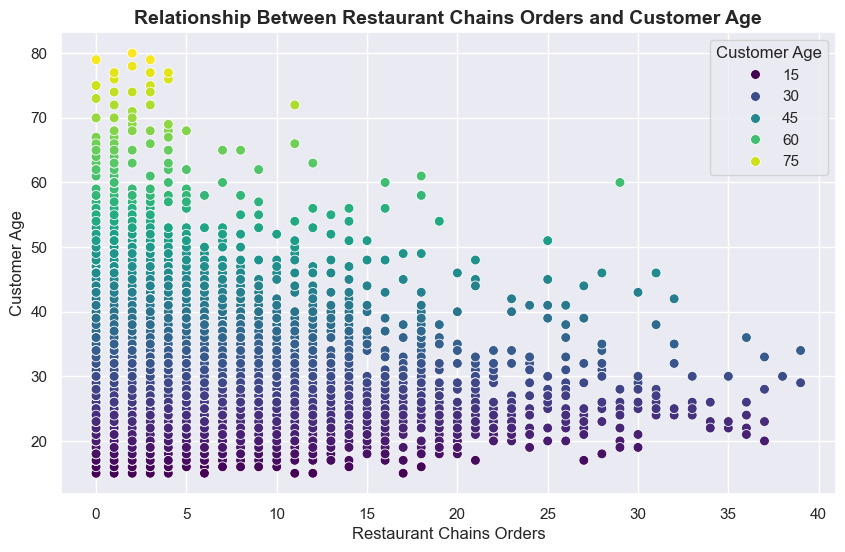

In [74]:
df_for_plot = df.drop_duplicates()
df_plot = df_for_plot[df_for_plot['is_chain'] < 40]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='is_chain', y='customer_age', hue='customer_age', palette='viridis', s=50)

# Adding plot title and labels
plt.title('Relationship Between Restaurant Chains Orders and Customer Age', fontsize=14, weight='bold')
plt.xlabel('Restaurant Chains Orders')
plt.ylabel('Customer Age')
plt.legend(title='Customer Age')
plt.grid(True)
plt.show()

This graph only contains the `is_chain` feature up to 40. Let's now look at the outliers (customers who placed more than 40 orders at restaurant chains).

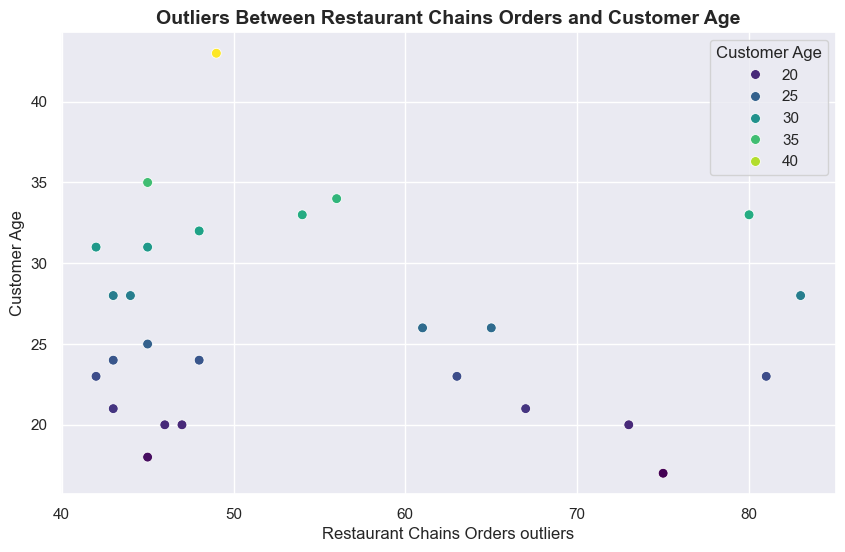

In [75]:
df_for_plot = df.drop_duplicates()
df_plot = df_for_plot[df_for_plot['is_chain'] > 40]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='is_chain', y='customer_age', hue='customer_age', palette='viridis', s=50)

# Adding plot title and labels
plt.title('Outliers Between Restaurant Chains Orders and Customer Age', fontsize=14, weight='bold')
plt.xlabel('Restaurant Chains Orders outliers')
plt.ylabel('Customer Age')
plt.legend(title='Customer Age')
plt.grid(True)
plt.show()

Therefore, we were able to conclude that younger customers (under 40 years of age) are those who are most likely to order from chain restaurants.

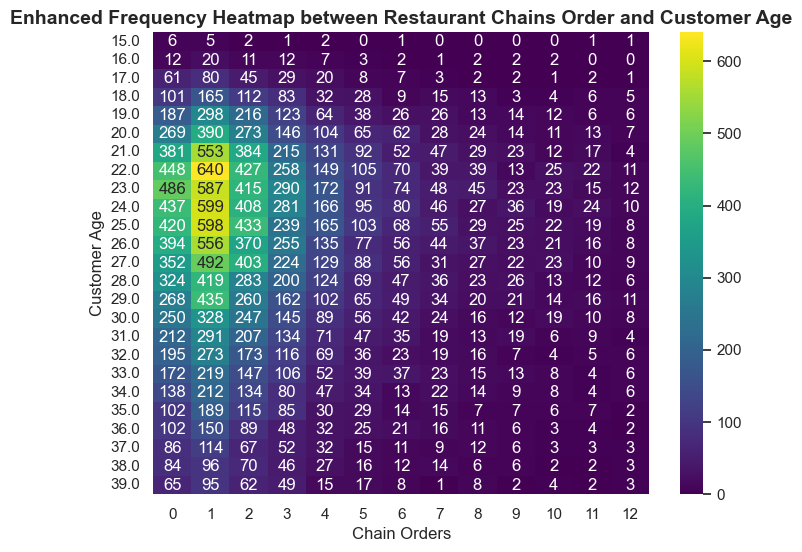

In [76]:
# Get a dataframe for plotting with less outliers 
df_for_plot = df_for_plot[df_for_plot['is_chain'] < 13]
df_plot = df_for_plot[df_for_plot['customer_age'] < 40]

# Create a frequency table using pivot_table
heatmap_data = df_plot.pivot_table(index='customer_age', columns='is_chain', aggfunc='size', fill_value=0)

# Enhanced heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data,fmt="g", annot=True, cmap="viridis")

plt.title("Enhanced Frequency Heatmap between Restaurant Chains Order and Customer Age", fontsize=14, weight='bold')
plt.xlabel("Chain Orders")
plt.ylabel("Customer Age")
plt.show()

We can see in the graph that there is a greater correlation between customers who order between 0-4 orders from chain restaurants and who are between 20 and 30 years old.
###
There is an extremely high correlation between one order from a chain restaurant and the age of 21 to 26.

______

>## 3.10 Chain Restaurants and most frequently used Payment Method <a class="anchor" id="chain_payment"></a>

Although it is clear that the number of orders from chain restaurants is very often equal to 1, and although the most frequent payment method is card, I do not believe that there is a very clear relationship between the variables as it complies with the standards previously observed frequencies.

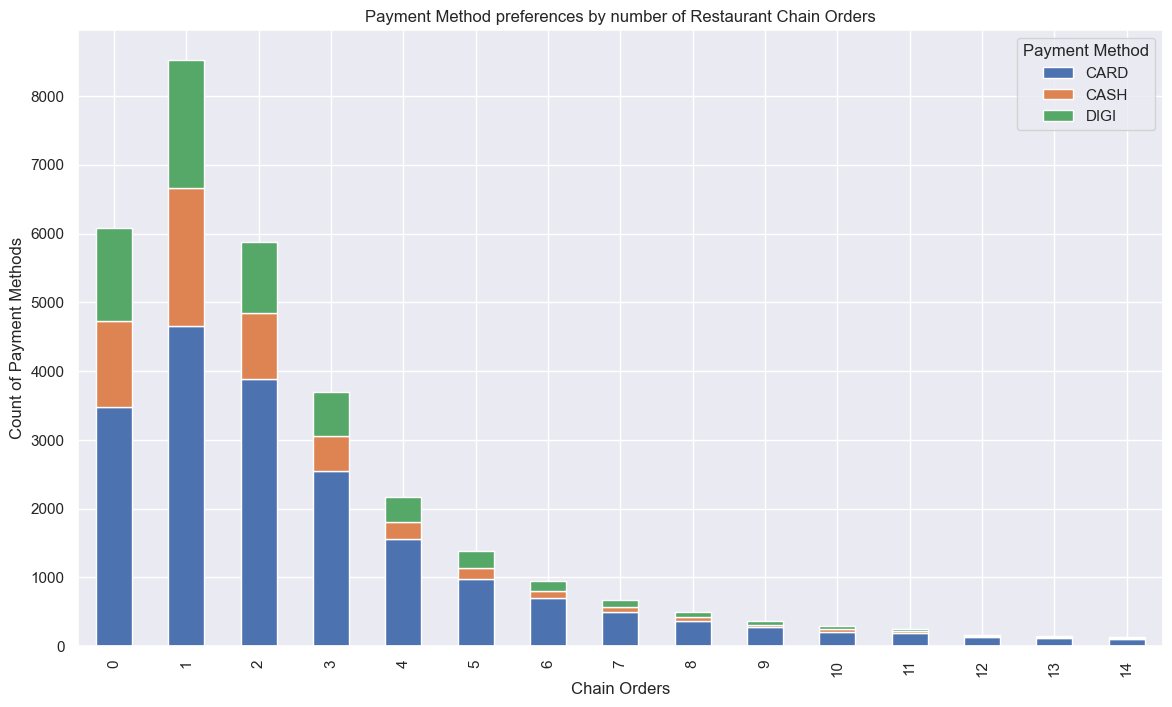

In [77]:
# Ensure unique rows only
df_for_plot = df.drop_duplicates()
df_plot = df_for_plot[df_for_plot['is_chain']<15]

# Group by age group and payment method, then count occurrences
age_payment_counts = df_plot.groupby(['is_chain', 'payment_method']).size().unstack(fill_value=0)

# Plot
age_payment_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Payment Method preferences by number of Restaurant Chain Orders')
plt.xlabel('Chain Orders')
plt.ylabel('Count of Payment Methods')
plt.legend(title='Payment Method')
plt.show()

It is possible to observe that the most frequent number of chain restaurant orders is 1 and that the respective payment method is by card, but again I believe that there is no direct correlation between the variables since it only obeys the frequency of both and not to a newly detected pattern.

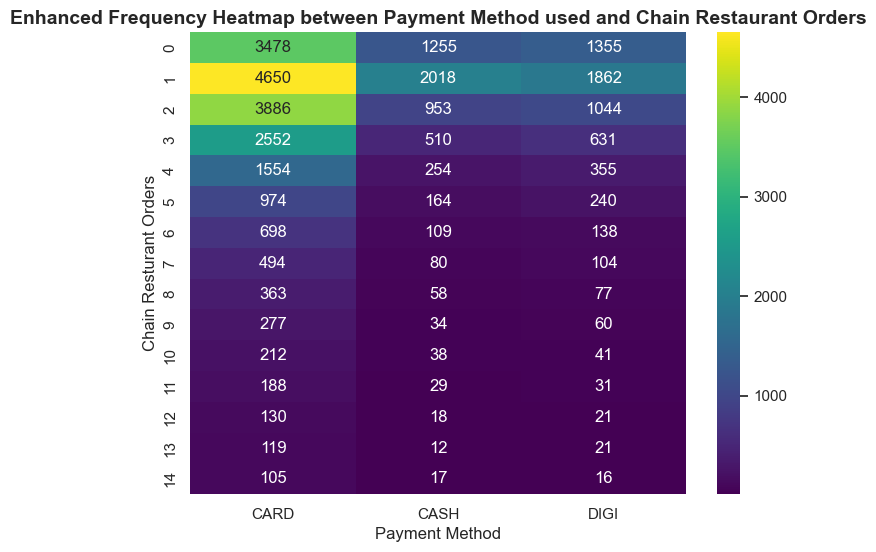

In [78]:
# Get a dataframe for plotting with less outliers 
df_plot = df_for_plot[df_for_plot['is_chain'] < 15]

# Create a frequency table using pivot_table
heatmap_data = df_plot.pivot_table(index='is_chain', columns='payment_method', aggfunc='size', fill_value=0)

# Enhanced heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data,fmt="g", annot=True, cmap="viridis")

plt.title("Enhanced Frequency Heatmap between Payment Method used and Chain Restaurant Orders", fontsize=14, weight='bold')
plt.xlabel("Payment Method")
plt.ylabel("Chain Resturant Orders")
plt.show()

______

>## 3.11 Customer Region and type of Cuisine most purchased <a class="anchor" id="region_cui"></a>

As we already know, there are three customer regions that face the most: 8670, 4660 and 2360. As always, those who live in these regions have preferences for spending more money on different foods.

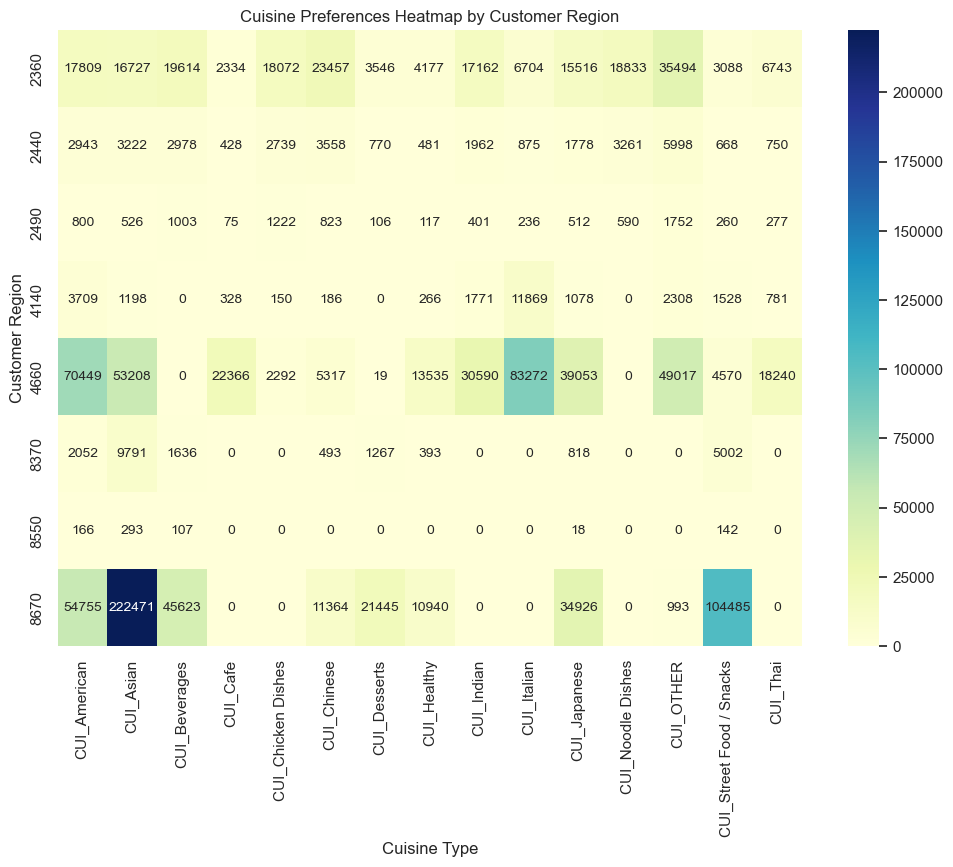

In [79]:
cui_cols = df_for_plot.columns[df_for_plot.columns.str.startswith('CUI_')]
region_cuisine_counts = df_for_plot.groupby('customer_region')[cui_cols].sum().round().astype(int) 

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(region_cuisine_counts, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}) 
plt.title('Cuisine Preferences Heatmap by Customer Region')
plt.xlabel('Cuisine Type')
plt.ylabel('Customer Region')
plt.show()

- Those living in the `2360` region do not spend significant amounts of money on different types of food.
- Those who live in the `4660` region spend more money on American cuisine and Italian cuisine.
- Those living in the `8670` region spend a lot of money on Asian food and then on street food/snacks.

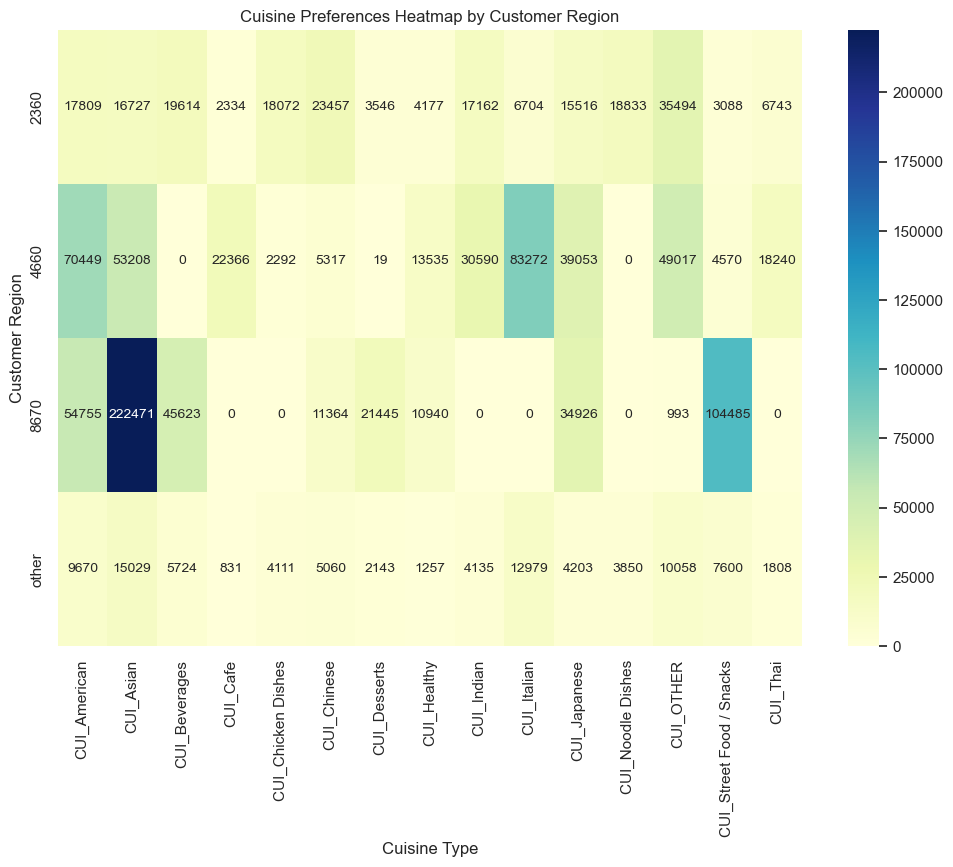

In [80]:
# Use .loc to replace specified customer regions with 'other'
df_for_plot.loc[df_for_plot['customer_region'].isin(['8550', '8370', '4140', '2490', '2440']), 'customer_region'] = 'other'

# Group by modified 'customer_region' and aggregate sum of cuisines
region_cuisine_counts = df_for_plot.groupby('customer_region')[cui_cols].sum().round().astype(int) 

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_cuisine_counts, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}) 
plt.title('Cuisine Preferences Heatmap by Customer Region')
plt.xlabel('Cuisine Type')
plt.ylabel('Customer Region')
plt.show()

______

>## 3.12 Customer Region and Costumer Age <a class="anchor" id="region_age"></a>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22600\1466804881.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_age_group.pivot_table(index='customer_region', columns='age_group', aggfunc='size', fill_value=0)


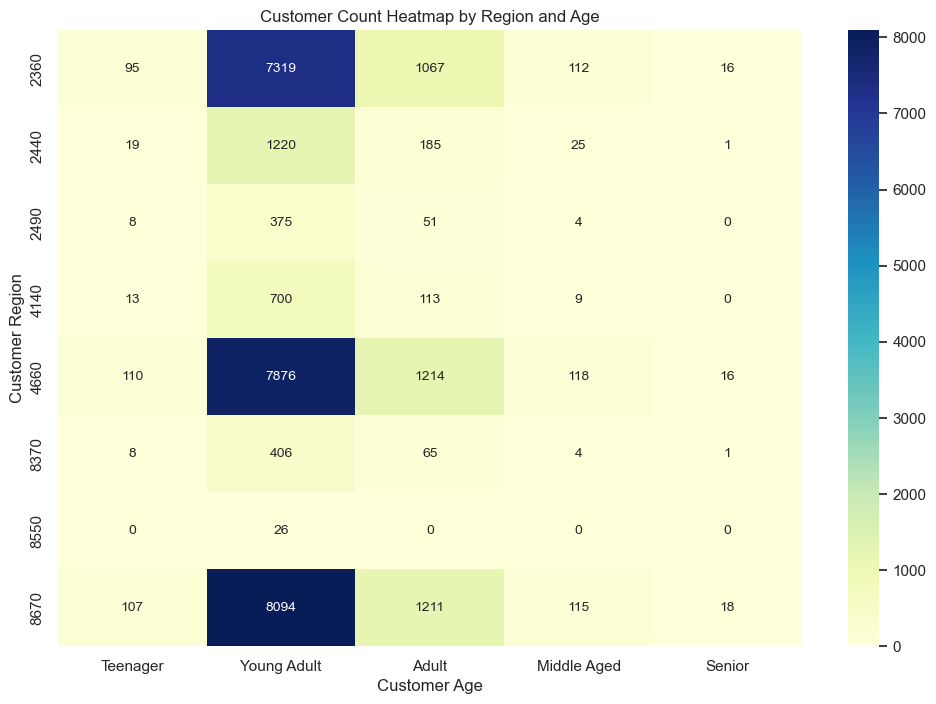

In [81]:
# Create a pivot table of customer counts by region and age
pivot_table = df_age_group.pivot_table(index='customer_region', columns='age_group', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10})
plt.title('Customer Count Heatmap by Region and Age')
plt.xlabel('Customer Age')
plt.ylabel('Customer Region')
plt.show()

______

># **4. Feature Engineering** <a class="anchor" id="feature_eng"></a>

All the features created during the feature engineering process are useful for conducting a more detailed analysis of customer data. Although these new features have not undergone a thorough data exploration, each has already been indirectly examined and used in previous analyses. Therefore, revisiting these features in more detail would be redundant.

>## **4.1 Total Orders Section** <a class="anchor" id="total_ord"></a>

By introducing this new feature, `total_orders`, we will gain a deeper understanding of the number of orders placed by each customer, which will also allow us to correlate this information with various data present in the dataset. 

In [82]:
#total orders

#We think its a feature we should add because the information related to the amount of requests by customer in all of the dataset, in this case
#3 months will be usefull to correlate information with various data present in the dataset

df['total_orders'] = df.iloc[:, 24:31].sum(axis=1)
df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2        NaN           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0        NaN           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0        NaN           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0                0.0   
5d272b9dcb         

In [83]:
df['total_orders'].describe()

count    31888.000000
mean         4.368822
std          5.084469
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         94.000000
Name: total_orders, dtype: float64

In [84]:
df['total_orders'].value_counts()

total_orders
2     7220
1     6911
3     5097
4     3169
5     2213
6     1492
7     1142
8      829
9      648
10     499
11     412
12     313
13     258
14     234
15     189
16     155
0      138
17     124
18      99
19      99
20      84
21      68
22      64
23      49
24      45
25      40
26      36
27      30
30      24
28      20
31      18
32      16
29      16
36      12
33      12
37       9
35       9
34       8
43       7
47       7
41       7
42       7
39       6
54       5
44       4
60       3
53       3
51       3
38       3
62       2
61       2
82       2
63       2
40       2
50       2
52       2
58       2
69       2
48       1
49       1
45       1
75       1
80       1
91       1
55       1
65       1
46       1
70       1
94       1
90       1
57       1
59       1
Name: count, dtype: int64

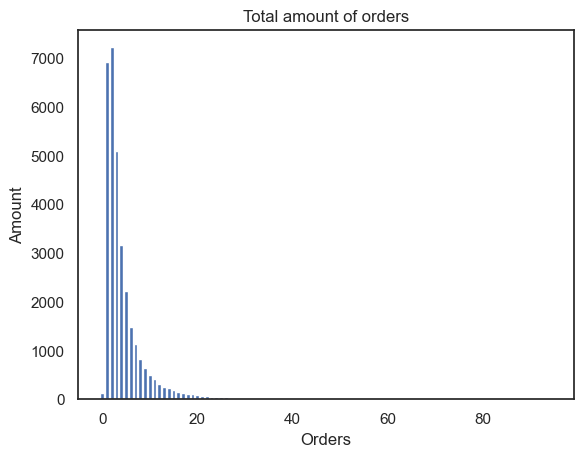

In [85]:
# barplot for total order
sns.set_theme(style="white")
fig, ax = plt.subplots()
total_orders = df['total_orders'].dropna().value_counts()
ax.bar(total_orders.index, total_orders.values)
plt.title('Total amount of orders')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

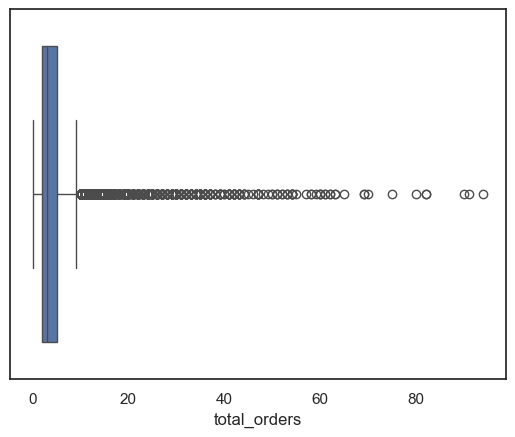

In [86]:
sns.boxplot(x=df['total_orders'].dropna())

plt.show()

#As we can see there are a lot of outliers, but it doesnt make sense to remove them, because they represent the usual customers,
#and as a business we have a lot of interest in this type of customers

______

>## **4.2 Mealtime Hours** <a class="anchor" id="meal_hour"></a>

Six new features have been created to record the times when orders were placed, related to meals: `Early Morning`, `Breakfast`, `Lunch`, `Afternoon Snack`, `Dinner`, and `Supper`. This will make it easier to analyze which meal is most frequently ordered by customers. 

In [87]:
#Hours grouped by time people eat their food

#We think this is a good way to show how the time of the day can be decisive in the purchases of the clients

hours_data = df.iloc[:,31:55]
hours_data

HR_0  HR_1  HR_2  HR_3  HR_4  HR_5  HR_6  HR_7  HR_8  HR_9  \
customer_id                                                               
1b8f824d5e    0.0     0     0     0     0     0     0     0     0     0   
5d272b9dcb    0.0     0     0     0     0     0     0     0     0     0   
f6d1b2ba63    0.0     0     0     0     0     0     0     0     0     1   
180c632ed8    0.0     0     0     0     0     0     0     0     0     0   
4eb37a6705    0.0     0     0     0     0     0     0     0     1     1   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
f4e366c281    0.0     0     0     0     0     0     0     0     0     0   
f6b6709018    0.0     0     0     0     0     0     0     0     0     0   
f74ad8ce3f    0.0     0     0     0     0     1     0     0     0     0   
f7b19c0241    0.0     0     0     0     0     0     0     0     0     0   
fd40d3b0e0    0.0     0     0     0     0     0     0     0     0     0   

             HR_10  HR_11  HR_12  HR_13  HR_14  HR_15  HR_16  HR_17  HR_18  \
customer_id                                                                  
1b8f824d5e       0      0      0      0      0      0      0      0      2   
5d272b9dcb       1      1      0      0      0      0      0      0      0   
f6d1b2ba63       0      1      0      0      0      0      0      0      0   
180c632ed8       0      1      0      0      1      0      0      0      0   
4eb37a6705       0      0      0      0      0      0      0      0      0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
f4e366c281       0      0      0      1      0      0      0      0      0   
f6b6709018       0      0      0      0      0      0      1      0      0   
f74ad8ce3f       0      0      0      0      0      0      0      0      0   
f7b19c0241       0      1      0      0      0      0      0      0      0   
fd40d3b0e0       0      0      0      0      0      0      1      0      0   

             HR_19  HR_20  HR_21  HR_22  HR_23  
customer_id                                     
1b8f824d5e       0      0      0      0      0  
5d272b9dcb       0      0      0      0      0  
f6d1b2ba63       0      0      0      0      0  
180c632ed8       0      0      0      0      0  
4eb37a6705       0      0      0      0      0  
...            ...    ...    ...    ...    ...  
f4e366c281       0      0      0      0      0  
f6b6709018       0      0      0      0      0  
f74ad8ce3f       0      0      0      0      0  
f7b19c0241       0      0      0      0      0  
fd40d3b0e0       0      0      0      0      0  

[31888 rows x 24 columns]

In [88]:
hours_meal=pd.DataFrame()
hours = hours_data.fillna(0).astype(int)

hours_meal['Early morning'] = hours[['HR_1','HR_2','HR_3','HR_4','HR_5']].sum(axis=1) # 1-5
hours_meal['Breakfast'] = hours[['HR_6','HR_7','HR_8','HR_9','HR_10']].sum(axis=1) # 6-10
hours_meal['Lunch'] = hours[['HR_11','HR_12','HR_13','HR_14']].sum(axis=1) # 11-14
hours_meal['Afternoon Snack'] = hours[['HR_15','HR_16','HR_17','HR_18']].sum(axis=1) # 15-18
hours_meal['Dinner'] = hours[['HR_19','HR_20','HR_21']].sum(axis=1) # 19-21
hours_meal['Supper'] = hours[['HR_22','HR_23','HR_0']].sum(axis=1) # 22-0


In [89]:
df = pd.concat([df,hours_meal], axis=1)

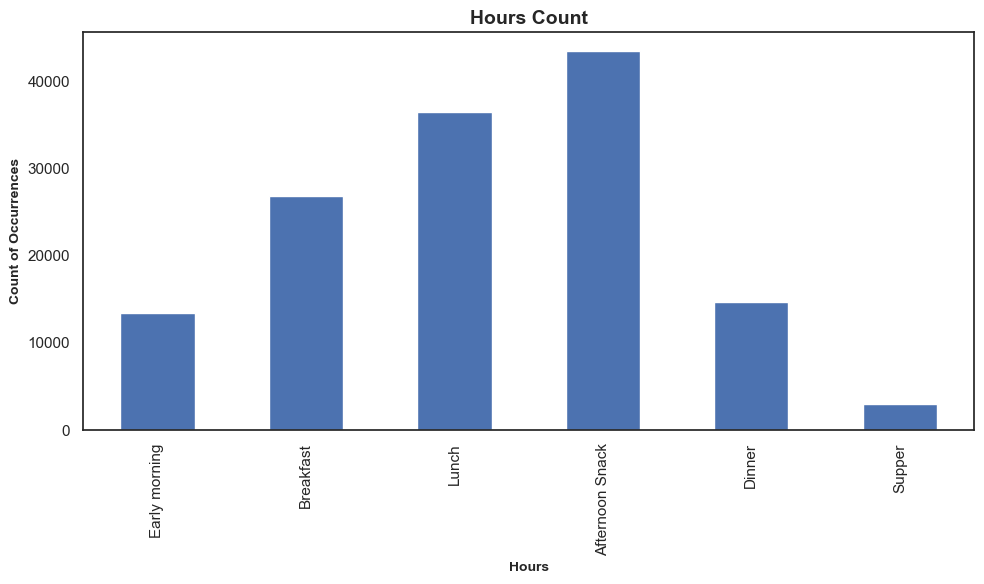

In [91]:
import matplotlib.pyplot as plt

# Select the relevant columns for the hours
hours_df = df[['Early morning', 'Breakfast', 'Lunch', 'Afternoon Snack', 'Dinner', 'Supper']]

# Create the plot
plt.figure(figsize=(10, 6))

# Count the occurrences and plot
hours_counts = hours_df.dropna().sum()  # Sum occurrences for each category
hours_counts.plot(kind='bar')

# Adjusting the title and labels
plt.title("Hours Count", fontsize=14, weight='bold')
plt.ylabel('Count of Occurrences', fontsize=10, weight='bold')
plt.xlabel('Hours', fontsize=10, weight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [90]:
df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2        NaN           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0        NaN           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0        NaN           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0                0.0   
5d272b9dcb         

_____

>## **4.3 Max Cuisine** <a class="anchor" id="max_cui"></a>

The new feature, `Max_CUI`, captures the type of cuisine in which each customer spends the most money. This feature is valuable for understanding consumer preferences, as it indicates the cuisine, they are most inclined to invest in. 

In [91]:
#Most bought food

df['Max_CUI'] = df.iloc[:,9:24].idxmax(axis=1)
df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2        NaN           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0        NaN           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0        NaN           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0                0.0   
5d272b9dcb         

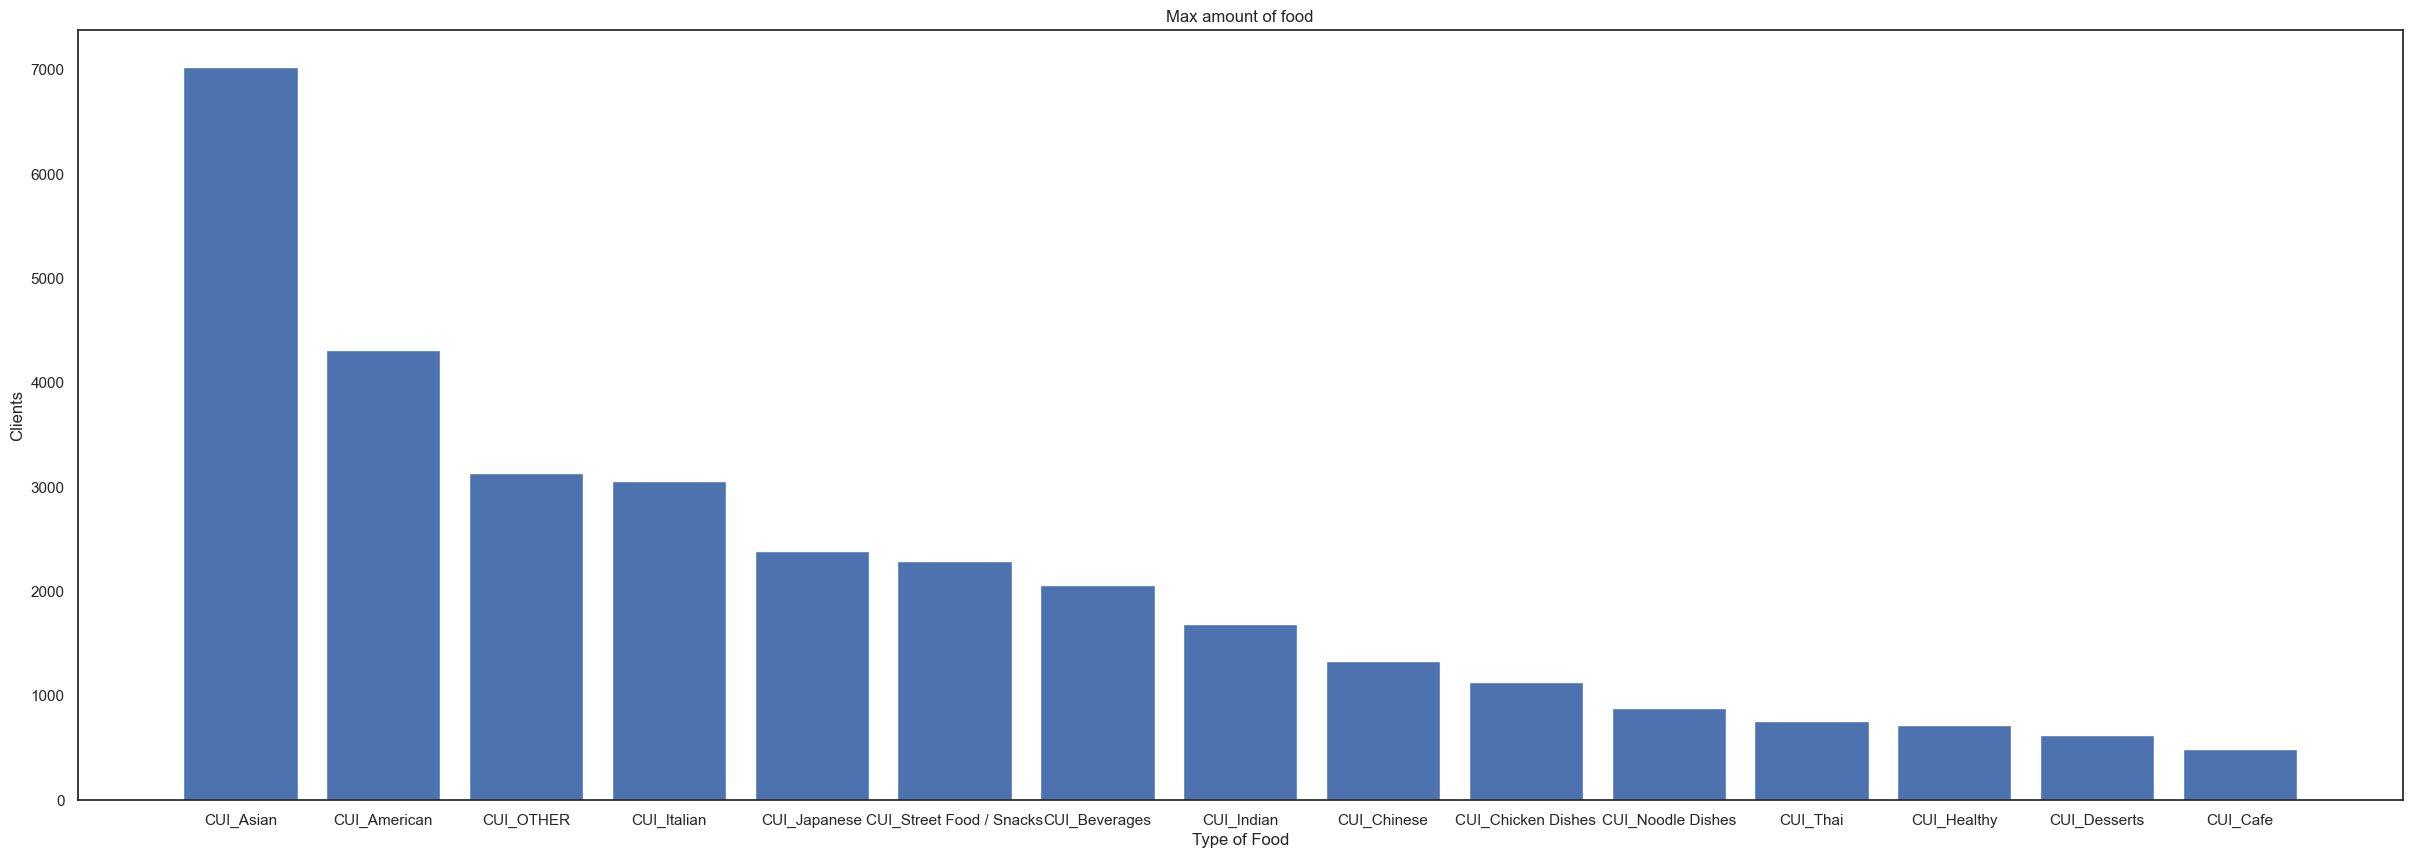

In [92]:
# barplot for total order
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(30, 10))
total_orders = df['Max_CUI'].dropna().value_counts()
ax.bar(total_orders.index, total_orders.values)
plt.title('Max amount of food')
plt.xlabel('Type of Food')
plt.ylabel('Clients')
plt.show()

______

>## **4.4 Group by Age Range** <a class="anchor" id="group_age"></a>

This feature, `age_group`, separates customers into different age brackets. This allows us to analyze customer preferences more rigorously based on their age classification. 

In [93]:
#Age Group

bins = [12, 18, 35, 50, 65, 100]
labels = ['Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
#12-17 Teenager
#18-34 Young Adult
#35-49 Adult
#50-64 Middle Aged
#65-100 Senior

df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)
df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2        NaN           DIGI   
...               ...          ...         ...        ...            ...   
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0        NaN           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0        NaN           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0                0.0   
5d272b9dcb         

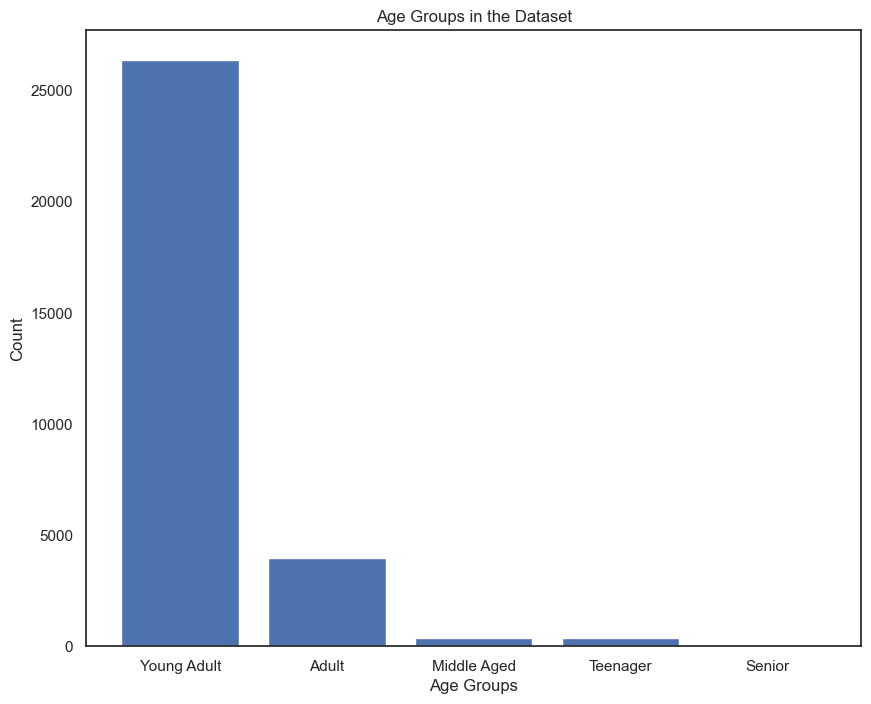

In [94]:
# barplot for total order
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))
total_orders = df['age_group'].dropna().value_counts()
ax.bar(total_orders.index, total_orders.values)
plt.title('Age Groups in the Dataset')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

________